# PyROOT

In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import ctypes
# To make dataframes 
import pandas as pd
import numpy as np

#import pandas as pd
#import seaborn as sn
#import matplotlib.pyplot as plt
#import numpy as np
#from scipy.optimize import curve_fit
#from scipy.stats import norm

Welcome to JupyROOT 6.31/01


In [2]:
f = ROOT.TFile("AnalysisResults.root") 
t = f.myTask
ROOT.EnableImplicitMT() #Esto activa el multihilo implícito
#df_root = ROOT.RDataFrame('myTask/fEventTree','AnalysisResults.root')
#df_root

In [3]:
fileName = "AnalysisResults.root"
treeName = "myTask/fEventTree"
df_root = ROOT.RDataFrame(treeName, fileName)
df_root

In [9]:
#VO time dataframe 
np_arays_V0 = df_root.AsNumpy(["fV0ATime","fV0CTime","fV0ADecision","fV0CDecision"])
df_pandas_V0 = pd.DataFrame(np_arays_V0)
df_pandas_V0
#df_pandas.to_csv('df_VOTime', index=True) 

,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision
0,10.907308,2.737122,1,1
1,-1024.000000,-1024.000000,0,0
2,-1024.000000,-1024.000000,0,0
3,-1024.000000,-1024.000000,0,0
4,-1024.000000,-1024.000000,0,0
...,...,...,...,...
4736,10.955568,2.731018,1,1
4737,11.854608,3.194482,1,1
4738,11.253976,2.274559,1,1
4739,11.275013,3.088775,1,1


In [10]:
#VO time dataframe 
#np_arays_V0 = df_root.AsNumpy(["fV0ATime","fV0CTime"])
np_arays_V0 = df_root.AsNumpy(["fV0ATime","fV0CTime","fV0ADecision","fV0CDecision"])
df_pandas_V0 = pd.DataFrame(np_arays_V0)
#df_pandas
df_pandas_V0.to_csv('Data/df_V0Time_Decision.csv', index=False) 

In [29]:
#AD time dataframe 
np_arays_AD = df_root.AsNumpy(["fADATime","fADCTime","fADADecision","fADCDecision"])
df_pandas_AD = pd.DataFrame(np_arays_AD)
#df_pandas_AD
df_pandas_AD.to_csv('Data/df_ADTime_Decision.csv', index=False) 

# **Python** 

In [1]:
import pandas as pd
import numpy as np
#Graphs
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sn
from scipy.stats import norm

In [2]:
class MyDataframe:
    def __init__(self):
        self.list1 = []  # Se inicializa la primera lista 
        self.list2 = []  # Se inicializa la segunda lista 

    def add_item(self, item, list_number=1):
        # Agregar elemento a la lista especificada (1 o 2)
        if list_number == 1:
            self.list1.append(item)
        elif list_number == 2:
            self.list2.append(item)
        else:
            raise ValueError("list_number debe ser 1 o 2.")

    def to_dataframe(self):
        # Para asegurar de que ambas listas tengan la misma longitud completando con None donde sea necesario
        max_len = max(len(self.list1), len(self.list2))
        list1_filled = self.list1 + [None] * (max_len - len(self.list1))
        list2_filled = self.list2 + [None] * (max_len - len(self.list2))
        
        # Crear un DataFrame con ambas listas como columnas
        return pd.DataFrame({'Eficiencia': list1_filled, 'Resolucion temporal': list2_filled})
        
# Crear una instancia de MyDataframe
my_two_lists = MyDataframe()


# Usar add_item para agregar valores a cada lista, ejemplo:
#my_two_lists.add_item(valor, list_number=1)
#my_two_lists.add_item(valor, list_number=2)

In [54]:
# Create a DataFrame from the lists
df_EfiTime = my_two_lists.to_dataframe()

# Print the DataFrame
df_EfiTime
#df_EfiTime.to_csv('Data/pb/df_EfiTime_pb.csv', index=False)
#print(df)

,Eficiencia,Resolucion temporal
0,96.000000,0.968107
1,96.110345,1.233753
2,96.000000,0.915095
3,94.206897,0.871845
4,99.554990,0.493521
5,99.512609,3.044079
6,99.554990,0.929568
7,99.152363,0.502885
8,99.470290,0.479436
9,99.470290,4.226243


In [19]:
t = np.arange(0, 700, step=50)
t

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650])

In [20]:
df_EfiTime_f = pd.read_csv('Data/pb/df_EfiTime_pb.csv')
data = [0, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700]
df_EfiTime_f['Rango'] = data
df_EfiTime_f

,Eficiencia,Resolucion temporal,Rango
0,96.000000,0.968107,0
1,96.110345,1.233753,100
2,96.000000,0.915095,150
3,94.206897,0.871845,200
4,99.554990,0.493521,250
5,99.512609,3.044079,300
6,99.554990,0.929568,350
7,99.152363,0.502885,400
8,99.470290,0.479436,450
9,99.470290,4.226243,500


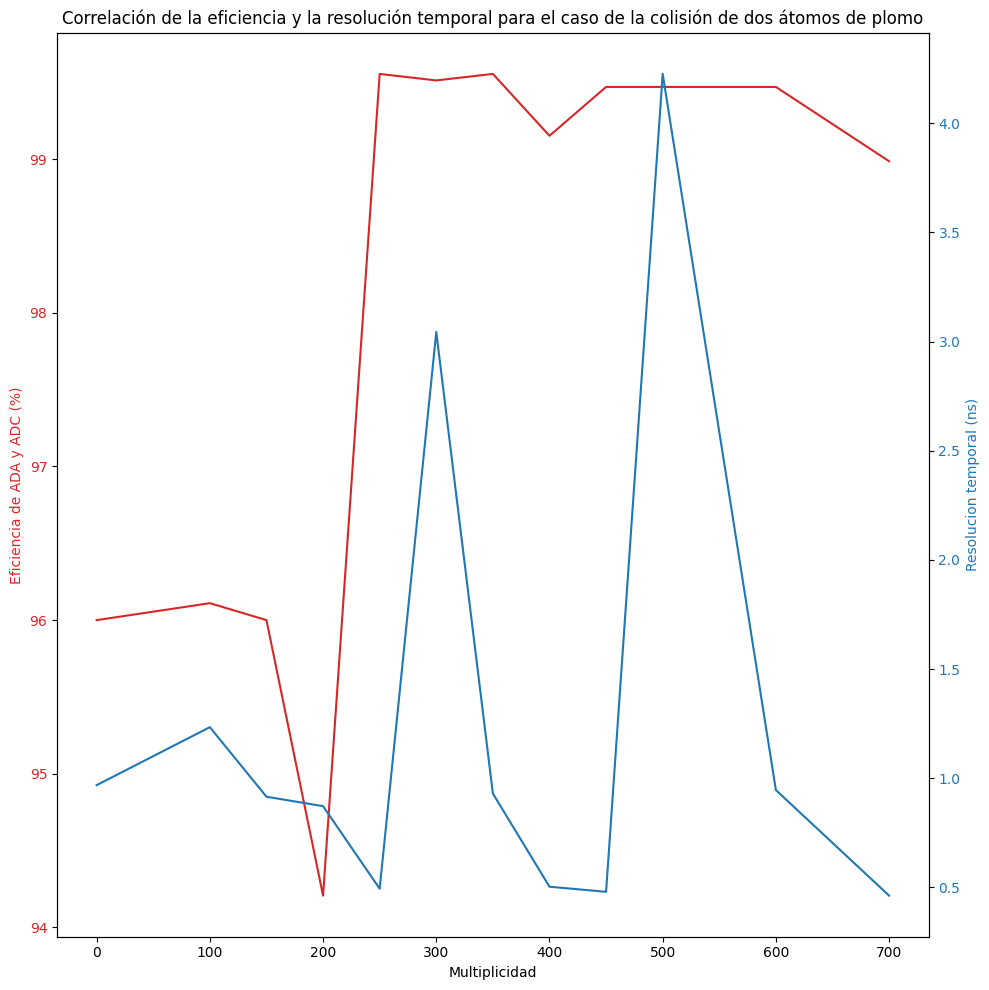

In [22]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 10))

#t = np.arange(0, 6, step=0.5)

# Plot data for the first y-axis (e.g., Temperature)
ax1.plot(df_EfiTime_f['Rango'], df_EfiTime_f['Eficiencia'], color='tab:red', label='Eficiencia')
ax1.set_xlabel('Multiplicidad')
ax1.set_ylabel('Eficiencia de ADA y ADC (%)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_EfiTime_f['Rango'], df_EfiTime_f['Resolucion temporal'], color='tab:blue', label='Promedio')
ax2.set_ylabel('Resolucion temporal (ns)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Show the plot
plt.title('Correlación de la eficiencia y la resolución temporal para el caso de la colisión de dos átomos de plomo')
fig.tight_layout()  # Adjust layout to prevent label overlap
#fig.savefig("Resultados/Tiempo/pb/Correlacion_pb.png") 
plt.show()

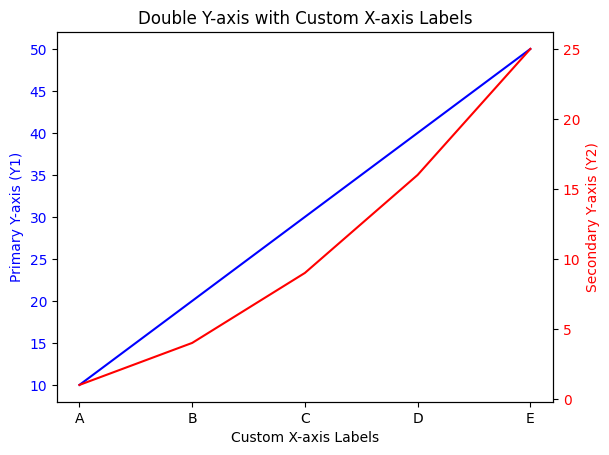

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.array([1, 2, 3, 4, 5])
y1 = np.array([10, 20, 30, 40, 50])  # Data for the first y-axis
y2 = np.array([1, 4, 9, 16, 25])     # Data for the second y-axis

# Create a figure and primary axis
fig, ax1 = plt.subplots()

# Plot on the first y-axis
ax1.plot(x, y1, color='b', label='Y1 Data')
ax1.set_xlabel('Custom X-axis Labels')
ax1.set_ylabel('Primary Y-axis (Y1)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set custom x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(['A', 'B', 'C', 'D', 'E'])

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', label='Y2 Data')
ax2.set_ylabel('Secondary Y-axis (Y2)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Display the plot
plt.title('Double Y-axis with Custom X-axis Labels')
plt.show()


In [14]:
df_ADyV0 = pd.read_csv('Data/pb/df_ADyV0_AC_pb.csv')
#df_ADyV0

In [6]:
df_ADyV0_D = df_ADyV0[(df_ADyV0['fADADecision'] == 1) & (df_ADyV0['fADCDecision'] == 1) & (df_ADyV0['fV0ADecision'] == 1) & (df_ADyV0['fV0CDecision'] == 1)]

In [8]:
df_ADyV0_DV0 = df_ADyV0[(df_ADyV0['fV0ADecision'] == 1) & (df_ADyV0['fV0CDecision'] == 1)]
#df_ADyV0_DV0

# Eficiencia de ADA y ADC

In [3]:
#df_ADyV0 = pd.read_csv('Data/pb/df_ADyV0_AC_pb.csv')
#df_ADyV0.replace(-1024.000000, 0, inplace=True)
#df_Multiplicity = pd.read_csv('Data/pb/df_Multiplicity_pb_mean.csv') 
#df_result = pd.concat([df_ADyV0, df_Multiplicity], axis = 1)

In [2]:
df_result = pd.read_csv('Data/pb/df_V0yAD_pb.csv')
df_result

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD,Time V0,Time AD
0,56.672527,64.506424,1,1,10.810712,2.254692,1,1,258.457969,4447.641380,6.027303,52.999871
1,56.363200,64.968285,1,1,11.165974,3.369427,1,1,73.820938,1971.272060,7.073135,60.663086
2,56.884500,64.750130,1,1,12.382841,3.200753,1,1,2.448426,112.389265,3.190859,60.949535
3,56.806347,65.596930,1,1,12.060843,4.141077,1,1,45.903435,686.068694,7.931896,60.901374
4,56.890340,64.809200,1,1,7.727922,2.277894,1,1,527.949958,8250.845551,5.458299,46.138455
...,...,...,...,...,...,...,...,...,...,...,...,...
19532,56.105220,65.261710,1,1,7.845979,2.589957,1,1,466.083782,6621.020508,5.353988,60.695015
19533,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
19534,56.406680,64.808700,1,1,9.572428,2.171332,1,1,449.924681,8239.601074,5.503199,60.617722
19535,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.012879,3.607266,0.000000,0.000000


In [11]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
###df_result_V0###

In [13]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_ADC = df_result_V0[(df_result_V0['fADCDecision'] == 1)]
df_result_ADC
#efi_ADC = (df_result_ADC['fADCDecision'] == 1).sum()
#print(efi_ADC)

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD,Time V0,Time AD
0,56.672527,64.506424,1,1,10.810712,2.254692,1,1,258.457969,4447.641380,6.027303,52.999871
1,56.363200,64.968285,1,1,11.165974,3.369427,1,1,73.820938,1971.272060,7.073135,60.663086
2,56.884500,64.750130,1,1,12.382841,3.200753,1,1,2.448426,112.389265,3.190859,60.949535
3,56.806347,65.596930,1,1,12.060843,4.141077,1,1,45.903435,686.068694,7.931896,60.901374
4,56.890340,64.809200,1,1,7.727922,2.277894,1,1,527.949958,8250.845551,5.458299,46.138455
...,...,...,...,...,...,...,...,...,...,...,...,...
19530,56.382730,64.890510,1,1,11.405587,3.054033,1,1,122.948612,2313.020996,6.969378,60.696920
19531,56.061802,65.063770,1,1,10.023675,2.743769,1,1,331.367336,6004.527786,6.057264,57.088163
19532,56.105220,65.261710,1,1,7.845979,2.589957,1,1,466.083782,6621.020508,5.353988,60.695015
19534,56.406680,64.808700,1,1,9.572428,2.171332,1,1,449.924681,8239.601074,5.503199,60.617722


In [15]:
df_result_ADA = df_result[(df_result['fADADecision'] == 1)]
#df_result_ADA

### Eficiencia de cada lado de AD

In [72]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_ADA = df_result_V0[(df_result_V0['fADADecision'] == 1)]

efi_ADA = (df_result_ADA ['fADADecision'] == 1).sum()
efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADA:", efi_ADA, "#Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("Eficiencia ADA: ", (efi_ADA/(efi_V0A))*100,"%")

#Even_ADA: 15984 #Even_V0A: 16318 #Even_V0C: 16318
Eficiencia ADA:  97.9531805368305 %


In [73]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_ADC = df_result_V0[(df_result_V0['fADCDecision'] == 1)]

efi_ADC = (df_result_ADC['fADCDecision'] == 1).sum()
efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADC:", efi_ADC, "#Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("Eficiencia ADA: ", (efi_ADC/(efi_V0A))*100, "%")

#Even_ADC: 15988 #Even_V0A: 16318 #Even_V0C: 16318
Eficiencia ADA:  97.97769334477265 %


### Eficiencia global

In [74]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_AD_AC = df_result_V0[(df_result_V0['fADADecision'] == 1) | (df_result_V0['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC ['fADADecision'] == 1).sum()

efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", (efi_ADA/(efi_V0A))*100,"%")

#Even_ADA: 15984 #Even_ADC: 15984   #Even_V0A: 16318 #Even_V0C: 16318
ε_1:  97.9531805368305 %


In [75]:
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result_AD_AC = df_result_V0[(df_result_V0['fADADecision'] == 1) & (df_result_V0['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC ['fADADecision'] == 1).sum()

efi_V0A = (df_result_V0 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0 ['fV0CDecision'] == 1).sum()

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_2: ", (efi_ADA/(efi_V0A))*100,"%")

#Even_ADA: 15812 #Even_ADC: 15812   #Even_V0A: 16318 #Even_V0C: 16318
ε_2:  96.89912979531805 %


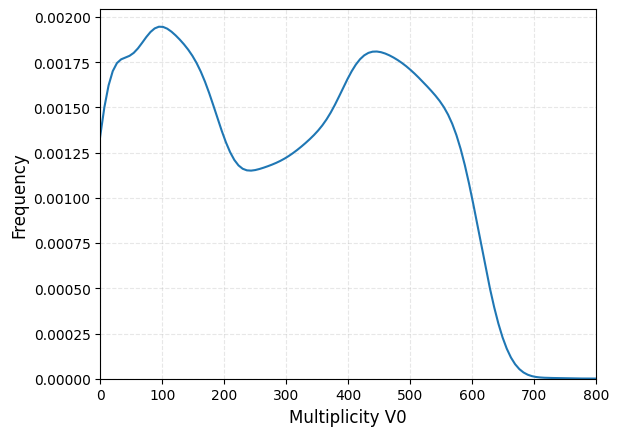

In [79]:
#V0
df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
sn.kdeplot(data = df_result_V0["Multiplicity V0"])
plt.xlim([0,800])  
plt.xlabel("Multiplicity V0", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()
#(0,250), (250, 450), (450,700)

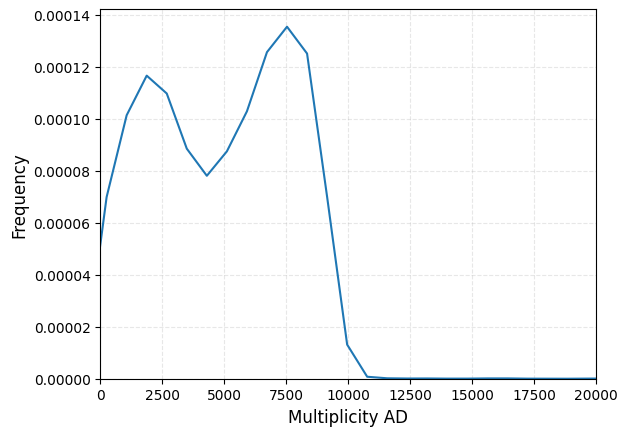

In [83]:
#AD
df_result_AD = df_result[(df_result['fADADecision'] == 1) & (df_result['fADCDecision'] == 1)]
sn.kdeplot(data = df_result_AD["Multiplicity AD"])
plt.xlim([0,20000])  
plt.xlabel("Multiplicity AD", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

In [14]:
#df_result_AD

### Eficiencia por rangos de multiplicidad en V0

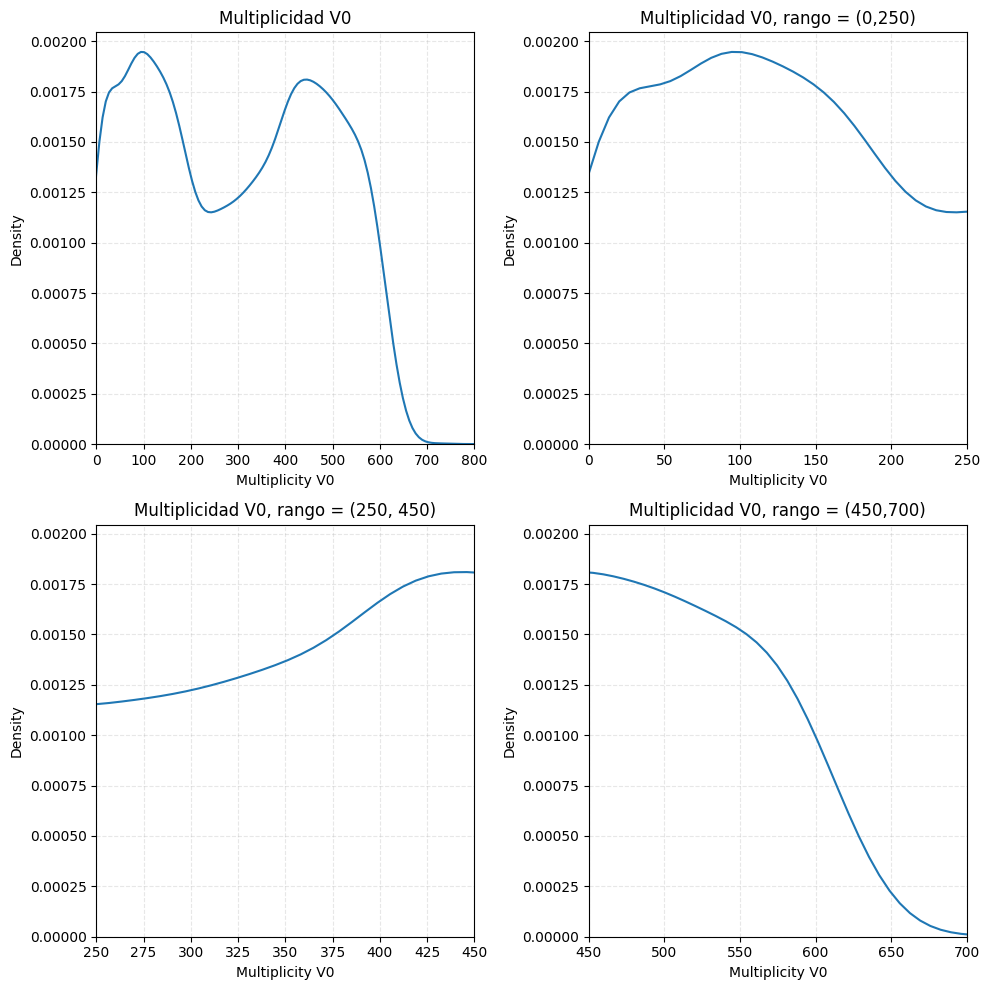

In [10]:
# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot on the second subplot
sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[0,0])
axes[0,0].set_xlim(0, 800)
axes[0,0].grid(True, alpha=0.3, linestyle="--") 
axes[0,0].set_title('Multiplicidad V0')

#(0,250), (250, 450), (450,700)
# Plot on the first subplot
sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[0,1])
axes[0,1].set_xlim(0, 250)
axes[0,1].grid(True, alpha=0.3, linestyle="--") 
axes[0,1].set_title('Multiplicidad V0, rango = (0,250)')

# Plot on the fourth subplot
sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[1,0])
axes[1,0].set_xlim(250, 450)
axes[1,0].grid(True, alpha=0.3, linestyle="--") 
axes[1,0].set_title('Multiplicidad V0, rango = (250, 450)')

# Plot on the third subplot
sn.kdeplot(data = df_result_V0["Multiplicity V0"], ax=axes[1,1])
axes[1,1].set_xlim(450, 700)
axes[1,1].grid(True, alpha=0.3, linestyle="--") 
axes[1,1].set_title('Multiplicidad V0, rango = (450,700)')


# Adjust the spacing between plots
plt.tight_layout()

#fig.savefig("out.png") 

# Display the plot
plt.show()

In [75]:
#V0
#df_result_V0 = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
#fig, axes = plt.subplots(1, 1, figsize=(8, 8))
#sn.kdeplot(data = df_result_V0["Multiplicity V0"])
#(0,250), (250, 450), (450,700)
#plt.xlim([0, 800])  
#plt.xlabel("Multiplicity V0", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")    
#fig.savefig("MultiplicityV0_pb.png") 
#plt.show()

In [18]:
df_ADyV0 = pd.read_csv('Data/pb/df_V0yAD_pb.csv')
df_result = df_ADyV0[  (df_ADyV0['fV0ATime']>0) & (df_ADyV0['fV0CTime'] >0)] 
df_result = df_result[(df_result['fV0ADecision'] == 1) & (df_result['fV0CDecision'] == 1)]
df_result

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD,Time V0,Time AD
0,56.672527,64.506424,1,1,10.810712,2.254692,1,1,258.457969,4447.641380,6.027303,52.999871
1,56.363200,64.968285,1,1,11.165974,3.369427,1,1,73.820938,1971.272060,7.073135,60.663086
2,56.884500,64.750130,1,1,12.382841,3.200753,1,1,2.448426,112.389265,3.190859,60.949535
3,56.806347,65.596930,1,1,12.060843,4.141077,1,1,45.903435,686.068694,7.931896,60.901374
4,56.890340,64.809200,1,1,7.727922,2.277894,1,1,527.949958,8250.845551,5.458299,46.138455
...,...,...,...,...,...,...,...,...,...,...,...,...
19530,56.382730,64.890510,1,1,11.405587,3.054033,1,1,122.948612,2313.020996,6.969378,60.696920
19531,56.061802,65.063770,1,1,10.023675,2.743769,1,1,331.367336,6004.527786,6.057264,57.088163
19532,56.105220,65.261710,1,1,7.845979,2.589957,1,1,466.083782,6621.020508,5.353988,60.695015
19534,56.406680,64.808700,1,1,9.572428,2.171332,1,1,449.924681,8239.601074,5.503199,60.617722


#### Rango (0,250)

In [19]:
df_result_V0_1 = df_result[(df_result['Multiplicity V0'] > 0) & (df_result['Multiplicity V0'] < 250)]
#df_result_V0_1

##### _Eficiencia de cada lado de AD_

_ADA_

In [20]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_ADA_1 = df_result_V0_1[(df_result_V0_1['fADADecision'] == 1)]

efi_ADA_1 = (df_result_ADA_1 ['fADADecision'] == 1).sum()
efi_V0A_1 = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C_1 = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA_1/(efi_V0A_1))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA_1, "#Even_V0A:", efi_V0A_1, "#Even_V0C:", efi_V0C_1)
print("Eficiencia ADA: ", Efi ,"%")

#Even_ADA: 6960 #Even_V0A: 7250 #Even_V0C: 7250
Eficiencia ADA:  96.0 %


_ADC_

In [7]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_ADC_1 = df_result_V0_1[(df_result_V0_1['fADCDecision'] == 1)]

efi_ADC_1 = (df_result_ADC_1 ['fADCDecision'] == 1).sum()
efi_V0A_1 = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C_1 = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADC_1/(efi_V0C_1))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADC:", efi_ADC_1, "#Even_V0A:", efi_V0A_1, "#Even_V0C:", efi_V0C_1)
print("Eficiencia ADC: ", Efi,"%")

#Even_ADC: 6968 #Even_V0A: 7250 #Even_V0C: 7250
Eficiencia ADC:  96.1103448275862 %


##### _Eficiencia global_

_or_

In [8]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_AD_AC_1 = df_result_V0_1[(df_result_V0_1['fADADecision'] == 1) | (df_result_V0_1['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_1 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_1 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 6960 #Even_ADC: 6968   #Even_V0A: 7250 #Even_V0C: 7250
ε_1:  96.0 %


_and_

In [9]:
df_result_V0_1 = df_result_V0_1[(df_result_V0_1['fV0ADecision'] == 1) & (df_result_V0_1['fV0CDecision'] == 1)]
df_result_AD_AC_1 = df_result_V0_1[(df_result_V0_1['fADADecision'] == 1) & (df_result_V0_1['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_1 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_1 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_1 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_1 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_2: ", Efi,"%")

#Even_ADA: 6830 #Even_ADC: 6830   #Even_V0A: 7250 #Even_V0C: 7250
ε_2:  94.20689655172414 %


#### Rango (250,450)

In [10]:
df_result_V0_2 = df_result[(df_result['Multiplicity V0'] > 250) & (df_result['Multiplicity V0'] < 450)]
#df_result_V0_2

##### _Eficiencia de cada lado de AD_

_ADA_

In [11]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_ADA_2 = df_result_V0_2[(df_result_V0_2['fADADecision'] == 1)]

efi_ADA_2 = (df_result_ADA_2 ['fADADecision'] == 1).sum()
efi_V0A_2 = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C_2 = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA_2/(efi_V0A_2))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA_2, "#Even_V0A:", efi_V0A_2, "#Even_V0C:", efi_V0C_2)
print("Eficiencia ADA: ", Efi,"%")

#Even_ADA: 4698 #Even_V0A: 4719 #Even_V0C: 4719
Eficiencia ADA:  99.55499046408137 %


_ADC_

In [12]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_ADC_2 = df_result_V0_2[(df_result_V0_2['fADCDecision'] == 1)]

efi_ADC_2 = (df_result_ADC_2 ['fADCDecision'] == 1).sum()
efi_V0A_2 = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C_2 = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADC_2/(efi_V0C_2))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADC:", efi_ADC_2, "#Even_V0A:", efi_V0A_2, "#Even_V0C:", efi_V0C_2)
print("Eficiencia ADC: ", Efi,"%")

#Even_ADC: 4696 #Even_V0A: 4719 #Even_V0C: 4719
Eficiencia ADC:  99.51260860351769 %


##### _Eficiencia global_

_or_

In [13]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_AD_AC_2 = df_result_V0_2[(df_result_V0_2['fADADecision'] == 1) | (df_result_V0_2['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_2 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_2 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 4698 #Even_ADC: 4696   #Even_V0A: 4719 #Even_V0C: 4719
ε_1:  99.55499046408137 %


_and_

In [14]:
df_result_V0_2 = df_result_V0_2[(df_result_V0_2['fV0ADecision'] == 1) & (df_result_V0_2['fV0CDecision'] == 1)]
df_result_AD_AC_2 = df_result_V0_2[(df_result_V0_2['fADADecision'] == 1) & (df_result_V0_2['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_2 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_2 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_2 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_2 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_2: ", Efi,"%")

#Even_ADA: 4679 #Even_ADC: 4679   #Even_V0A: 4719 #Even_V0C: 4719
ε_2:  99.15236278872642 %


#### Rango (450,700)

In [15]:
df_result_V0_3 = df_result[(df_result['Multiplicity V0'] > 450) & (df_result['Multiplicity V0'] < 700)]
#df_result_V0_3

##### _Eficiencia de cada lado de AD_

_ADA_

In [16]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_ADA_3 = df_result_V0_3[(df_result_V0_3['fADADecision'] == 1)]

efi_ADA_3 = (df_result_ADA_3 ['fADADecision'] == 1).sum()
efi_V0A_3 = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C_3 = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA_3/(efi_V0A_3))*100 
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA_3, "#Even_V0A:", efi_V0A_3, "#Even_V0C:", efi_V0C_3)
print("Eficiencia ADA: ", Efi,"%")

#Even_ADA: 4319 #Even_V0A: 4342 #Even_V0C: 4342
Eficiencia ADA:  99.47029018885306 %


_ADC_

In [17]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_ADC_3 = df_result_V0_3[(df_result_V0_3['fADCDecision'] == 1)]

efi_ADC_3 = (df_result_ADC_3 ['fADCDecision'] == 1).sum()
efi_V0A_3 = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C_3 = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADC_3/(efi_V0C_3))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADC:", efi_ADC_3, "#Even_V0A:", efi_V0A_3, "#Even_V0C:", efi_V0C_3)
print("Eficiencia ADA: ", Efi,"%")

#Even_ADC: 4319 #Even_V0A: 4342 #Even_V0C: 4342
Eficiencia ADA:  99.47029018885306 %


##### _Eficiencia global_

_or_

In [18]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_AD_AC_3 = df_result_V0_3[(df_result_V0_3['fADADecision'] == 1) | (df_result_V0_3['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_3 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_3 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 4319 #Even_ADC: 4319   #Even_V0A: 4342 #Even_V0C: 4342
ε_1:  99.47029018885306 %


_and_

In [19]:
df_result_V0_3 = df_result_V0_3[(df_result_V0_3['fV0ADecision'] == 1) & (df_result_V0_3['fV0CDecision'] == 1)]
df_result_AD_AC_3 = df_result_V0_3[(df_result_V0_3['fADADecision'] == 1) & (df_result_V0_3['fADCDecision'] == 1)]

efi_ADA = (df_result_AD_AC_3 ['fADADecision'] == 1).sum()
efi_ADC = (df_result_AD_AC_3 ['fADCDecision'] == 1).sum()

efi_V0A = (df_result_V0_3 ['fV0ADecision'] == 1).sum()
efi_V0C = (df_result_V0_3 ['fV0CDecision'] == 1).sum()

Efi = (efi_ADA/(efi_V0A))*100
#my_two_lists.add_item(Efi, list_number=1) ##

print("#Even_ADA:", efi_ADA, "#Even_ADC:", efi_ADC, "  #Even_V0A:", efi_V0A, "#Even_V0C:", efi_V0C)
print("\u03B5_1: ", Efi,"%")

#Even_ADA: 4298 #Even_ADC: 4298   #Even_V0A: 4342 #Even_V0C: 4342
ε_1:  98.98664210041456 %


# Multiplicidad 

### Multiplicidad AD

In [2]:
df_multyAD = pd.read_csv('Data/pb/df_fADMultiplicity_pb.csv')
df_multyAD

,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,val_15
0,6367.170410,6831.379395,7416.671875,6428.364258,6135.325684,7225.388672,8217.719727,8316.702148,1552.600830,2313.772949,1546.400391,1507.979248,1669.997192,2012.186890,1923.620605,1696.981812
1,2776.992432,2051.670410,3116.796631,2846.219238,2762.143799,2078.034912,3504.452881,3827.144531,1695.258057,1009.639343,819.680176,865.290222,1600.035034,794.494324,886.001770,906.499207
2,32.672623,90.834389,51.598515,72.650696,31.051342,77.858719,66.700752,143.655914,214.881836,164.770554,128.999146,119.670692,219.116501,128.256912,132.060165,123.449478
3,1302.632812,725.659424,1387.077637,915.203064,1362.966431,781.290527,1393.726562,1080.868652,174.837692,310.103973,201.922623,265.279907,229.111099,267.992126,283.432526,294.994049
4,10498.884766,11292.439453,14183.693359,13592.654297,10120.900391,11863.994141,15640.104492,17400.244141,3862.646484,4162.544922,2720.719482,2986.666016,3863.810303,3486.891602,3168.763672,3168.571289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,8753.755859,9476.451172,11708.796875,10284.658203,8350.271484,9759.233398,12763.975586,10259.078125,3044.244629,3710.345215,2640.252686,2569.922363,3206.665771,3184.963867,3293.778076,2929.934814
19533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19534,12173.632812,11879.945312,14727.471680,12075.979492,11988.197266,12691.022461,16516.289062,15255.108398,3364.597656,3672.870117,2522.066162,2793.357178,3259.137207,3075.172119,2926.235840,2912.534424
19535,0.000000,0.000000,18.448181,0.000000,0.000000,18.075590,11.108399,10.084085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
df_multyAD["Suma"] = df_multyAD.iloc[:, :].sum(axis = 1)
df_multyAD["Promedio"] = df_multyAD.iloc[:, :].mean(axis = 1)
df_multyAD

,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,val_15,Suma,Promedio
0,6367.170410,6831.379395,7416.671875,6428.364258,6135.325684,7225.388672,8217.719727,8316.702148,1552.600830,2313.772949,1546.400391,1507.979248,1669.997192,2012.186890,1923.620605,1696.981812,71162.262085,8372.030834
1,2776.992432,2051.670410,3116.796631,2846.219238,2762.143799,2078.034912,3504.452881,3827.144531,1695.258057,1009.639343,819.680176,865.290222,1600.035034,794.494324,886.001770,906.499207,31540.352966,3710.629761
2,32.672623,90.834389,51.598515,72.650696,31.051342,77.858719,66.700752,143.655914,214.881836,164.770554,128.999146,119.670692,219.116501,128.256912,132.060165,123.449478,1798.228233,211.556263
3,1302.632812,725.659424,1387.077637,915.203064,1362.966431,781.290527,1393.726562,1080.868652,174.837692,310.103973,201.922623,265.279907,229.111099,267.992126,283.432526,294.994049,10977.099106,1291.423424
4,10498.884766,11292.439453,14183.693359,13592.654297,10120.900391,11863.994141,15640.104492,17400.244141,3862.646484,4162.544922,2720.719482,2986.666016,3863.810303,3486.891602,3168.763672,3168.571289,132013.528809,15531.003389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,8753.755859,9476.451172,11708.796875,10284.658203,8350.271484,9759.233398,12763.975586,10259.078125,3044.244629,3710.345215,2640.252686,2569.922363,3206.665771,3184.963867,3293.778076,2929.934814,105936.328125,12463.097426
19533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19534,12173.632812,11879.945312,14727.471680,12075.979492,11988.197266,12691.022461,16516.289062,15255.108398,3364.597656,3672.870117,2522.066162,2793.357178,3259.137207,3075.172119,2926.235840,2912.534424,131833.617188,15509.837316
19535,0.000000,0.000000,18.448181,0.000000,0.000000,18.075590,11.108399,10.084085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.716256,6.790148


In [6]:
#plt.hist(df_multyAD['Suma'],bins=20)
#plt.hist(df_multyAD['Promedio'],bins=50)

In [7]:
#df_multyAD.hist(bins=20)

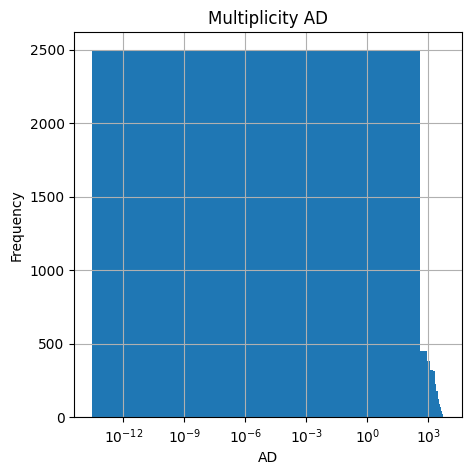

In [140]:
# Plotting Histogram for the 'Length' column 
plt.figure(figsize=(5, 5))
hist = df_multyAD['Suma'].hist(bins=15) 
plt.xscale('log')  
# Adding title and labels 
plt.title('Multiplicity AD') 
plt.xlabel('AD') 
plt.ylabel('Frequency') 

#plt.savefig('Resultados/TH1D_Multiplicity_AD.png')
# Display the histogram 
plt.show() 


In [16]:
df_multy = pd.read_csv('Data/df_fADMultiplicity.csv')
multy_array= df_multy.to_numpy().reshape(-1,1)
multy_array

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.06754753]])

In [17]:
multy_array.shape

(75856, 1)

In [18]:
df_time = pd.read_csv('Data/df_fADTime.csv')
time_array= df_time.to_numpy().reshape(-1,1)
time_array

array([[-1024.],
       [-1024.],
       [-1024.],
       ...,
       [-1024.],
       [-1024.],
       [-1024.]])

In [19]:
time_array.shape

(75856, 1)

In [20]:
new_df  =pd.DataFrame()
new_df['multy'] =pd.DataFrame(multy_array)
new_df['time'] =pd.DataFrame(time_array)
new_df = new_df[new_df['time'] >0]
new_df

,multy,time
304,9.278383,65.244522
305,2.779991,65.042465
306,159.738968,64.807777
307,55.312496,64.972237
308,13.327127,65.222801
...,...,...
75843,88.565315,65.663071
75844,133.724319,65.453445
75845,119.021439,64.903114
75846,44.800072,65.298203


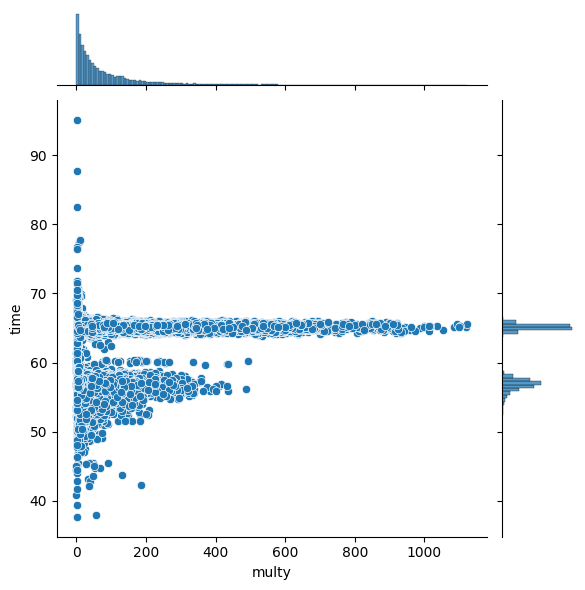

In [21]:
sn.jointplot(x= 'multy'  ,
             y= 'time' ,
             data=new_df)
#.savefig('AD_Multy_vs_Time.png')

<Axes: >

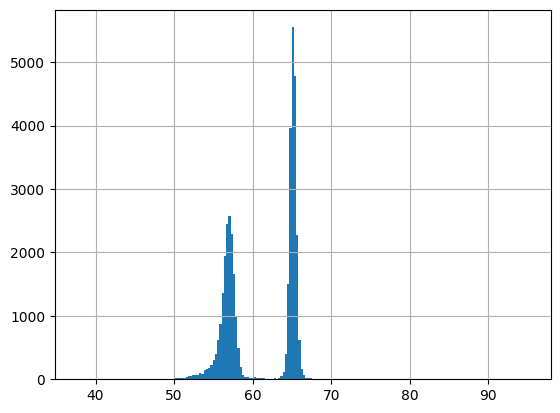

In [22]:
new_df['time'].hist(bins=200)

### Multiplicidad V0

In [10]:
df_multyV0 = pd.read_csv('Data/pb/df_fV0Multiplicity_pb.csv')
#df_multyV0

In [11]:
df_multyV0["Suma"] = df_multyV0.iloc[:, :].sum(axis = 1)
df_multyV0["Promedio"] = df_multyV0.iloc[:, :].mean(axis = 1) #es lo que se usará
df_multyV0

,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,...,val_56,val_57,val_58,val_59,val_60,val_61,val_62,val_63,Suma,Promedio
0,378.297089,347.555450,358.455627,367.835419,260.173798,302.769287,403.763153,387.487000,326.104279,319.037140,...,213.064743,212.147705,236.860199,266.727295,201.869904,205.703156,258.500793,283.745972,16541.310036,508.963386
1,84.309540,126.643944,119.987328,125.598572,67.706261,129.528076,101.910591,104.415283,66.363426,123.221939,...,63.188988,56.643688,54.456577,37.734791,61.378239,40.716930,54.573193,56.778347,4724.540022,145.370462
2,0.000000,0.881902,1.654974,12.194517,2.481338,15.721020,1.670583,1.338987,0.000000,4.536246,...,0.000000,0.000000,8.310030,1.088295,4.003110,16.804920,1.703258,6.146349,156.699290,4.821517
3,50.675373,45.546188,33.674274,52.224781,65.699455,62.912266,51.699940,30.878889,42.821522,101.173973,...,42.564602,56.865189,33.510979,45.191319,49.052658,46.912769,39.849266,58.312447,2937.819815,90.394456
4,620.542175,712.340271,844.872864,724.990112,688.248108,606.148743,708.117859,762.702332,632.445435,677.337341,...,513.355774,518.772095,541.580505,541.507263,587.200439,443.492981,582.377319,509.056885,33788.797318,1039.655302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,509.455444,603.223450,563.464417,590.570984,548.867554,574.015320,595.540955,718.396179,673.251770,486.326660,...,378.204193,354.715668,361.983002,409.075836,306.358551,348.253967,391.597443,404.562317,29829.362030,917.826524
19533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19534,598.276245,703.239929,743.295105,628.260742,617.731995,524.087097,601.672058,595.017578,690.401855,644.007080,...,388.784485,451.000671,364.859253,349.161285,439.892639,354.529633,404.660461,381.491150,28795.179565,886.005525
19535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.824263,0.025362


In [19]:
# Plotting Histogram for the 'Length' column 
#plt.figure(figsize=(5, 5))
#hist = df_multyV0['Suma'].hist(bins=20) 
#plt.xscale('log')
  
# Adding title and labels 
#plt.title('Multiplicity V0') 
#plt.xlabel('V0') 
#plt.ylabel('Frequency') 

#plt.savefig('Resultados/TH1D_Multiplicity_V0.png')
# Display the histogram 
#plt.show() 

Text(0.5, 1.0, 'MultiplicityV0 vs MultiplicityAD')

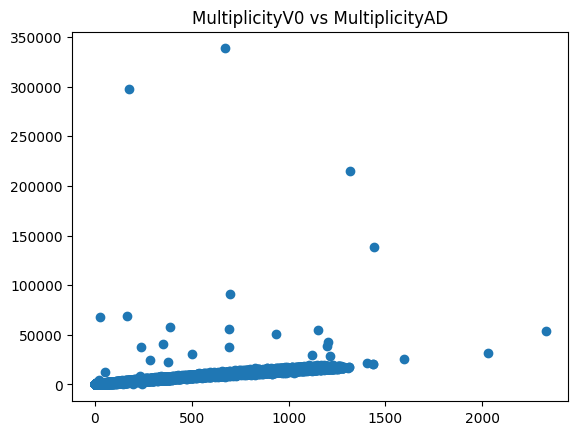

In [12]:
plt.plot(df_multyV0["Promedio"], df_multyAD["Promedio"], 'o' )
plt.title('MultiplicityV0 vs MultiplicityAD')

In [15]:
df_multyV0 = pd.read_csv('Data/pb/df_fV0Multiplicity_pb.csv')
df_multyAD = pd.read_csv('Data/pb/df_fADMultiplicity_pb.csv')

df_multyV0["Promedio"] = df_multyV0.iloc[:, :].mean(axis = 1)
df_multyAD["Promedio"] = df_multyAD.iloc[:, :].mean(axis = 1)

df_Multiplicity  = pd.DataFrame()

#new_df['multy'] =pd.DataFrame(multy_array)
#new_df['time'] =pd.DataFrame(time_array)
df_Multiplicity['Multiplicity V0'] = df_multyV0[['Promedio']].copy()
df_Multiplicity['Multiplicity AD'] = df_multyAD[['Promedio']].copy()

#df_Multiplicity.to_csv('Data/pb/df_Multiplicity_pb_mean.csv', index=False)
df_Multiplicity

In [16]:
df_Multiplicity = pd.read_csv('Data/pb/df_Multiplicity_pb_mean.csv')
df_Multiplicity

,Multiplicity V0,Multiplicity AD
0,258.457969,4447.641380
1,73.820938,1971.272060
2,2.448426,112.389265
3,45.903435,686.068694
4,527.949958,8250.845551
...,...,...
19532,466.083782,6621.020508
19533,0.000000,0.000000
19534,449.924681,8239.601074
19535,0.012879,3.607266


In [17]:
df_Multiplicity_f = df_Multiplicity[(df_Multiplicity['Multiplicity V0'] > 0) & (df_Multiplicity['Multiplicity AD'] > 0)]
df_Multiplicity_f

,Multiplicity V0,Multiplicity AD
0,258.457969,4447.641380
1,73.820938,1971.272060
2,2.448426,112.389265
3,45.903435,686.068694
4,527.949958,8250.845551
...,...,...
19531,331.367336,6004.527786
19532,466.083782,6621.020508
19534,449.924681,8239.601074
19535,0.012879,3.607266


In [20]:
# Plotting Histogram for the 'Length' column 
#plt.figure(figsize=(5, 5))
#hist = df_Multiplicity_f['Multiplicity V0'].hist(bins=18, range = (1, 1000) ) 
#plt.xscale('log')

# Adding title and labels 
#plt.title('Multiplicity V0 ') 
#plt.xlabel('V0') 
#plt.ylabel('Frequency') 

#plt.savefig('Resultados/TH1D_Multiplicity_V0.png')
# Display the histogram 
#plt.show()

In [180]:
new_df_1 = new_df[ (new_df['Multiplicity V0'] > 0) & (new_df['Multiplicity AD'] > 0) & (new_df['Multiplicity V0'] < 1000) & (new_df['Multiplicity AD'] < 1000) ]
new_df_1

,Multiplicity V0,Multiplicity AD
19,116.164190,706.966250
20,160.315454,388.174272
22,0.740641,0.742865
24,0.059948,1.846673
25,0.234258,1.254020
...,...,...
4731,0.926430,1.222105
4733,0.374640,1.059262
4737,61.512474,494.543999
4738,63.150544,770.583611


In [28]:
result = pd.concat([df_ADyV0, new_df], axis=1)
result

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD
0,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
1,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
2,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
3,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
4,-1024.000000,-1024.000000,0,0,-1024.000000,-1024.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4736,-1024.000000,65.510370,0,1,11.854608,3.194482,1,1,99.662499,2939.439920
4737,56.992820,64.960120,1,1,11.253976,2.274559,1,1,61.512474,494.543999
4738,57.766415,65.219330,1,1,11.275013,3.088775,1,1,63.150544,770.583611
4739,56.727490,65.166466,1,1,10.848169,2.735008,1,1,380.865531,4741.836430


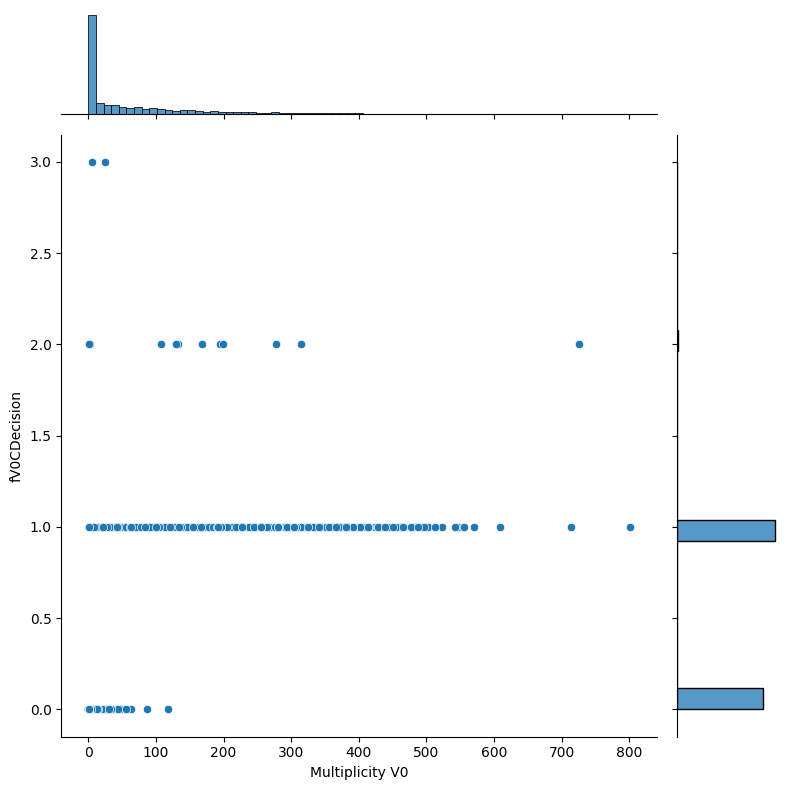

In [30]:
joint_plot = sn.jointplot(x= 'Multiplicity V0'  ,
             y= 'fV0CDecision' ,
             data=result, height=8)
# Adding the title using plt.suptitle()
#plt.suptitle('Multiplicity V0 vs Multiplicity AD', y=1.02)
#joint_plot.savefig("Resultados/Multiplicity_V0_AD.png")
plt.show()

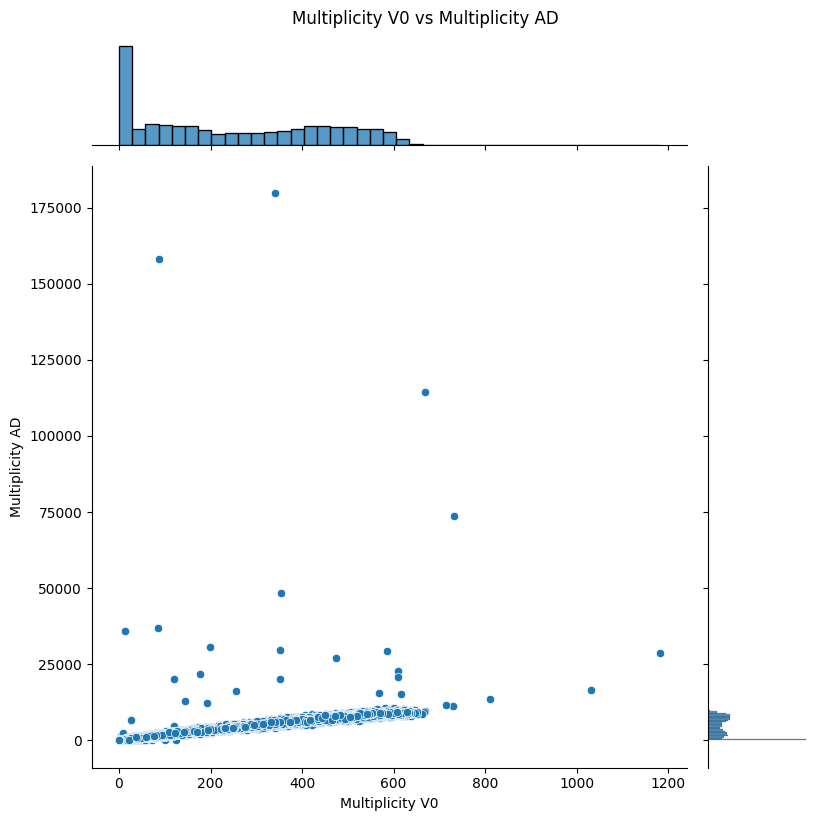

In [38]:
joint_plot = sn.jointplot(x= 'Multiplicity V0'  ,
             y= 'Multiplicity AD' ,
             data=df_Multiplicity, height=8)
# Adding the title using plt.suptitle()
plt.suptitle('Multiplicity V0 vs Multiplicity AD', y=1.02)
#joint_plot.savefig("Resultados/Multiplicity_V0_AD.png")
plt.show()

In [ ]:
df_Multiplicity_f = df_Multiplicity[(df_Multiplicity['Multiplicity V0'] > 0) & (df_Multiplicity['Multiplicity AD'] > 0)]
#df_Multiplicity_f

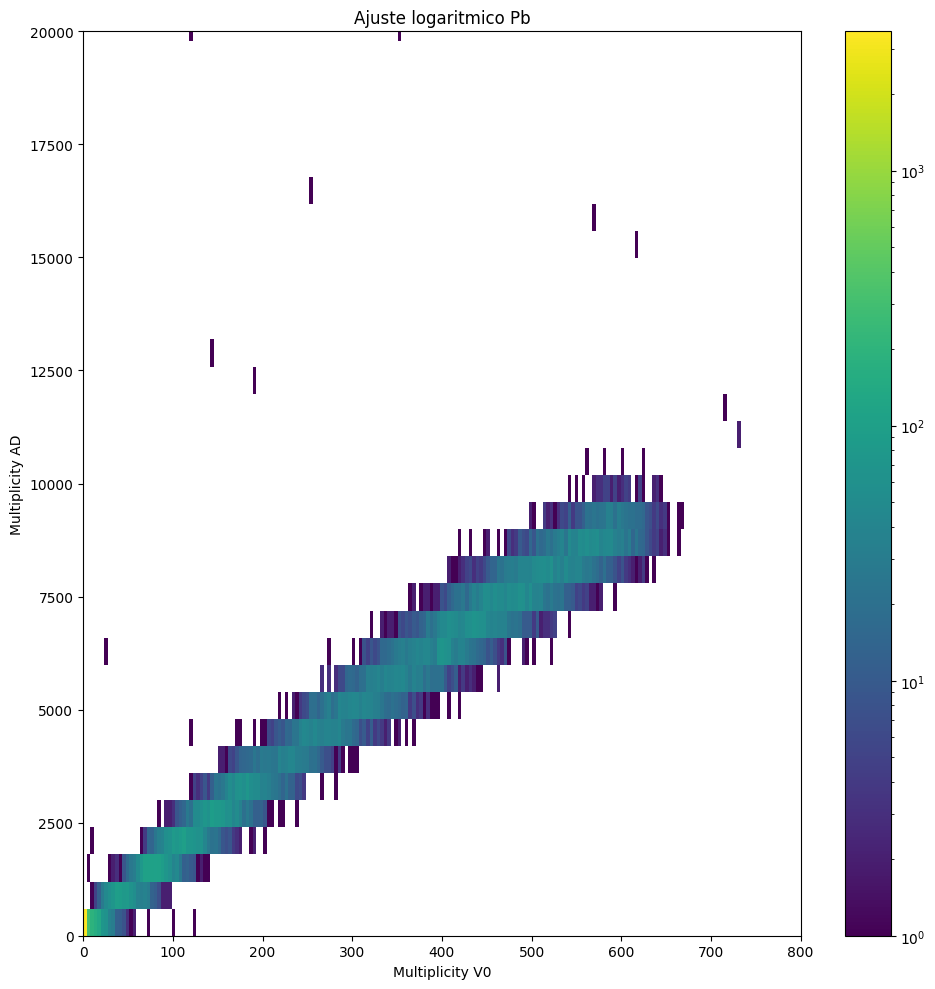

In [36]:
#fig, ax = plt.subplots(tight_layout=True)
fig, axs = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True,
                        tight_layout=True)
plt.hist2d( df_Multiplicity['Multiplicity V0'] , df_Multiplicity['Multiplicity AD'] , bins=(300,300), cmap='viridis', norm=colors.LogNorm()) 
plt.xlim([0,800]) #Cambiar según la escala
plt.ylim([0,20000]) #Cambiar según la escala
plt.title('Ajuste logaritmico Pb') 
plt.xlabel('Multiplicity V0') 
plt.ylabel('Multiplicity AD')
#plt.hist2d( new_df['Multiplicity V0'] , new_df['Multiplicity AD'] ) 
plt.colorbar() 
#plt.savefig('Resultados/TH2D_Multiplicity.png')

# Tiempo 

### Tiempo AD y V0

##### Análisis V0 Time sin filtrar

In [114]:
df_V0yAD = pd.read_csv('Data/pb/df_V0yAD_pb.csv')

In [116]:
#plt.figure(figsize = (10,10))
#sn.heatmap(df_V0yAD.corr(), annot = True, cmap = 'coolwarm')

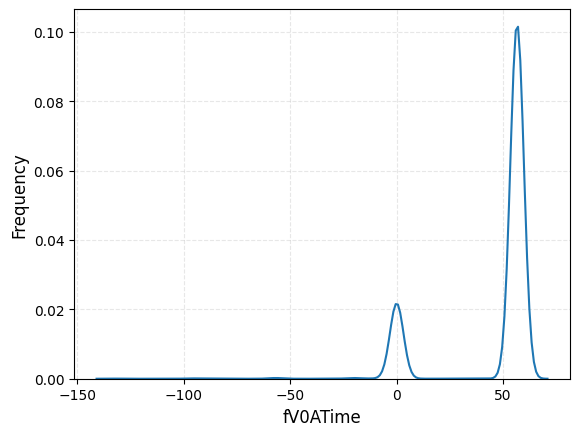

In [146]:
sn.kdeplot(data = df_V0yAD['fADATime'])
#plt.xlim([100,70])  
plt.xlabel("fV0ATime", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")   
plt.show()

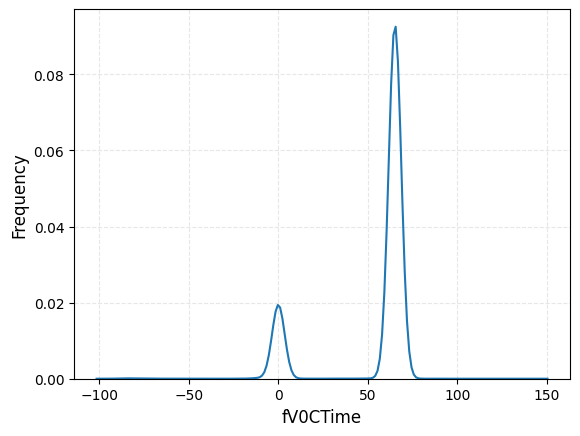

In [147]:
sn.kdeplot(data = df_V0yAD['fADCTime'])#.get_figure()#.savefig('ADATime_ADCTimeDis1.png')
#plt.xlim([70,70])  
plt.xlabel("fV0CTime", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")     
plt.show()

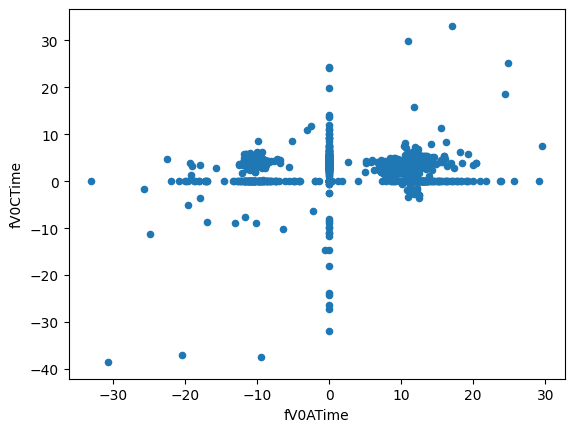

In [120]:
ax1 = df_V0yAD.plot.scatter(x='fV0ATime', y='fV0CTime')#.get_figure()#.savefig('V0ATime_VOCTime.png')

In [125]:
#Seccionando las cuatro partes donde se concentran las datos 
df_V0Time = pd.read_csv('Data/pb/df_V0yAD_pb.csv')
df_V0Time_rup = df_V0Time[  (df_V0Time['fV0ATime']>-1) & (df_V0Time['fV0CTime'] > -1)] 
df_V0Time_lup = df_V0Time[  (df_V0Time['fV0ATime']<-1) & (df_V0Time['fV0CTime'] > -1)] 
df_V0Time_rdown = df_V0Time[  (df_V0Time['fV0ATime']>-1) & (df_V0Time['fV0CTime'] < -1)] 
df_V0Time_ldown = df_V0Time[  (df_V0Time['fV0ATime']<-1) & (df_V0Time['fV0CTime'] < -1)] 

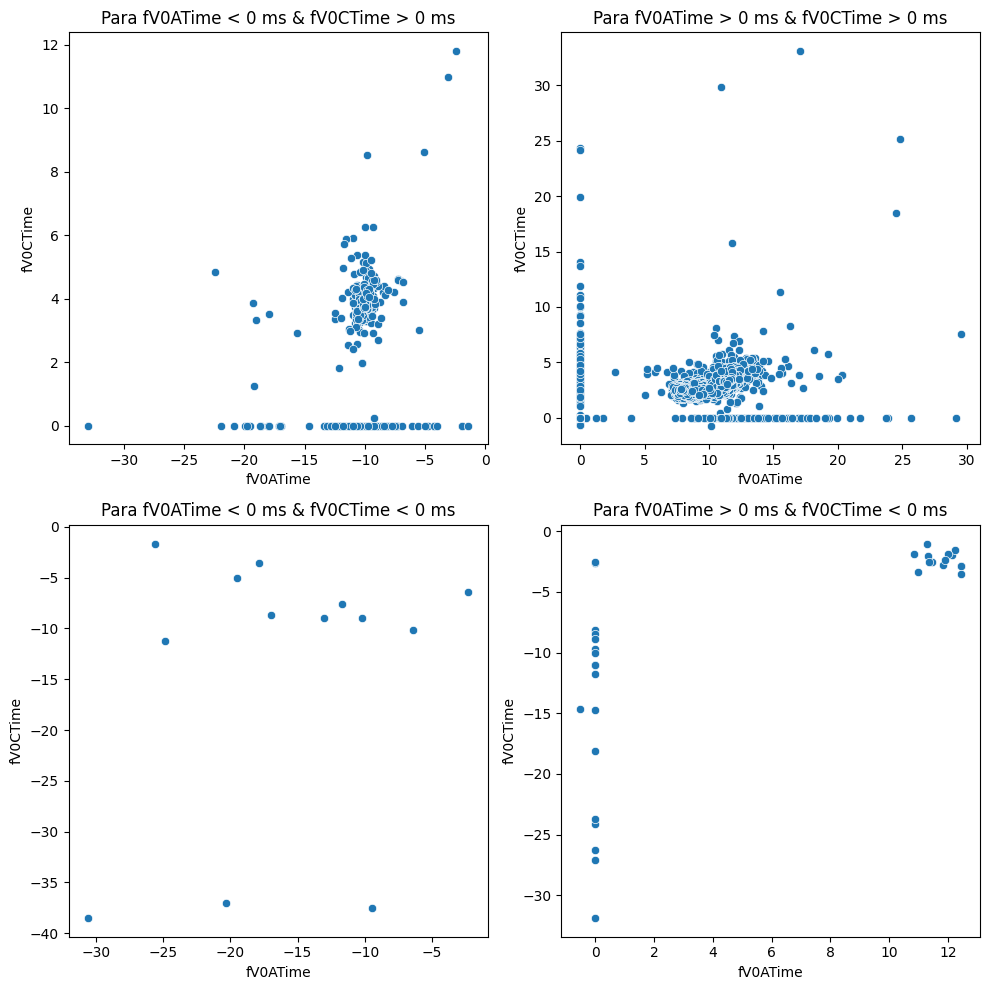

In [135]:
# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot on the second subplot
sn.scatterplot(data=df_V0Time_lup, x='fV0ATime', y='fV0CTime', ax=axes[0,0])
axes[0,0].set_title('Para fV0ATime < 0 ns & fV0CTime > 0 ns')

# Plot on the first subplot
sn.scatterplot(data=df_V0Time_rup, x='fV0ATime', y='fV0CTime', ax=axes[0,1])
axes[0,1].set_title('Para fV0ATime > 0 ns & fV0CTime > 0 ns')

# Plot on the fourth subplot
sn.scatterplot(data=df_V0Time_ldown, x='fV0ATime', y='fV0CTime', ax=axes[1,0])
axes[1,0].set_title('Para fV0ATime < 0 ns & fV0CTime < 0 ns')

# Plot on the third subplot
sn.scatterplot(data=df_V0Time_rdown, x='fV0ATime', y='fV0CTime', ax=axes[1,1])
axes[1,1].set_title('Para fV0ATime > 0 ns & fV0CTime < 0 ns')


# Adjust the spacing between plots
plt.tight_layout()

#fig.savefig("out.png") 

# Display the plot
plt.show()

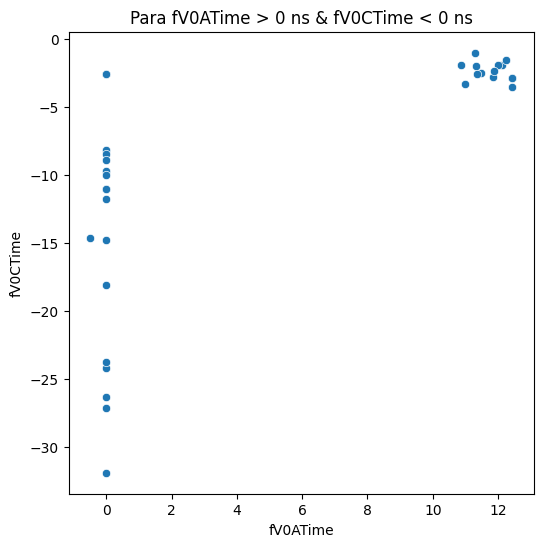

In [139]:
fig, axes = plt.subplots( figsize=(6, 6))
# Plot on the second subplot
sn.scatterplot(data=df_V0Time_rdown, x='fV0ATime', y='fV0CTime')
axes.set_title('Para fV0ATime > 0 ns & fV0CTime < 0 ns')
#fig.savefig("scatterplot_rdown_pb.png") 
plt.show()

In [140]:
df_ADyV0 = pd.read_csv('Data/pb/df_V0yAD_pb.csv')
df_ADyV0_D = df_ADyV0[(df_ADyV0['fADADecision'] == 1) & (df_ADyV0['fADCDecision'] == 1) & (df_ADyV0['fV0ADecision'] == 1) & (df_ADyV0['fV0CDecision'] == 1)]
df_ADyV0_DV0 = df_ADyV0[(df_ADyV0['fV0ADecision'] == 1) & (df_ADyV0['fV0CDecision'] == 1)]

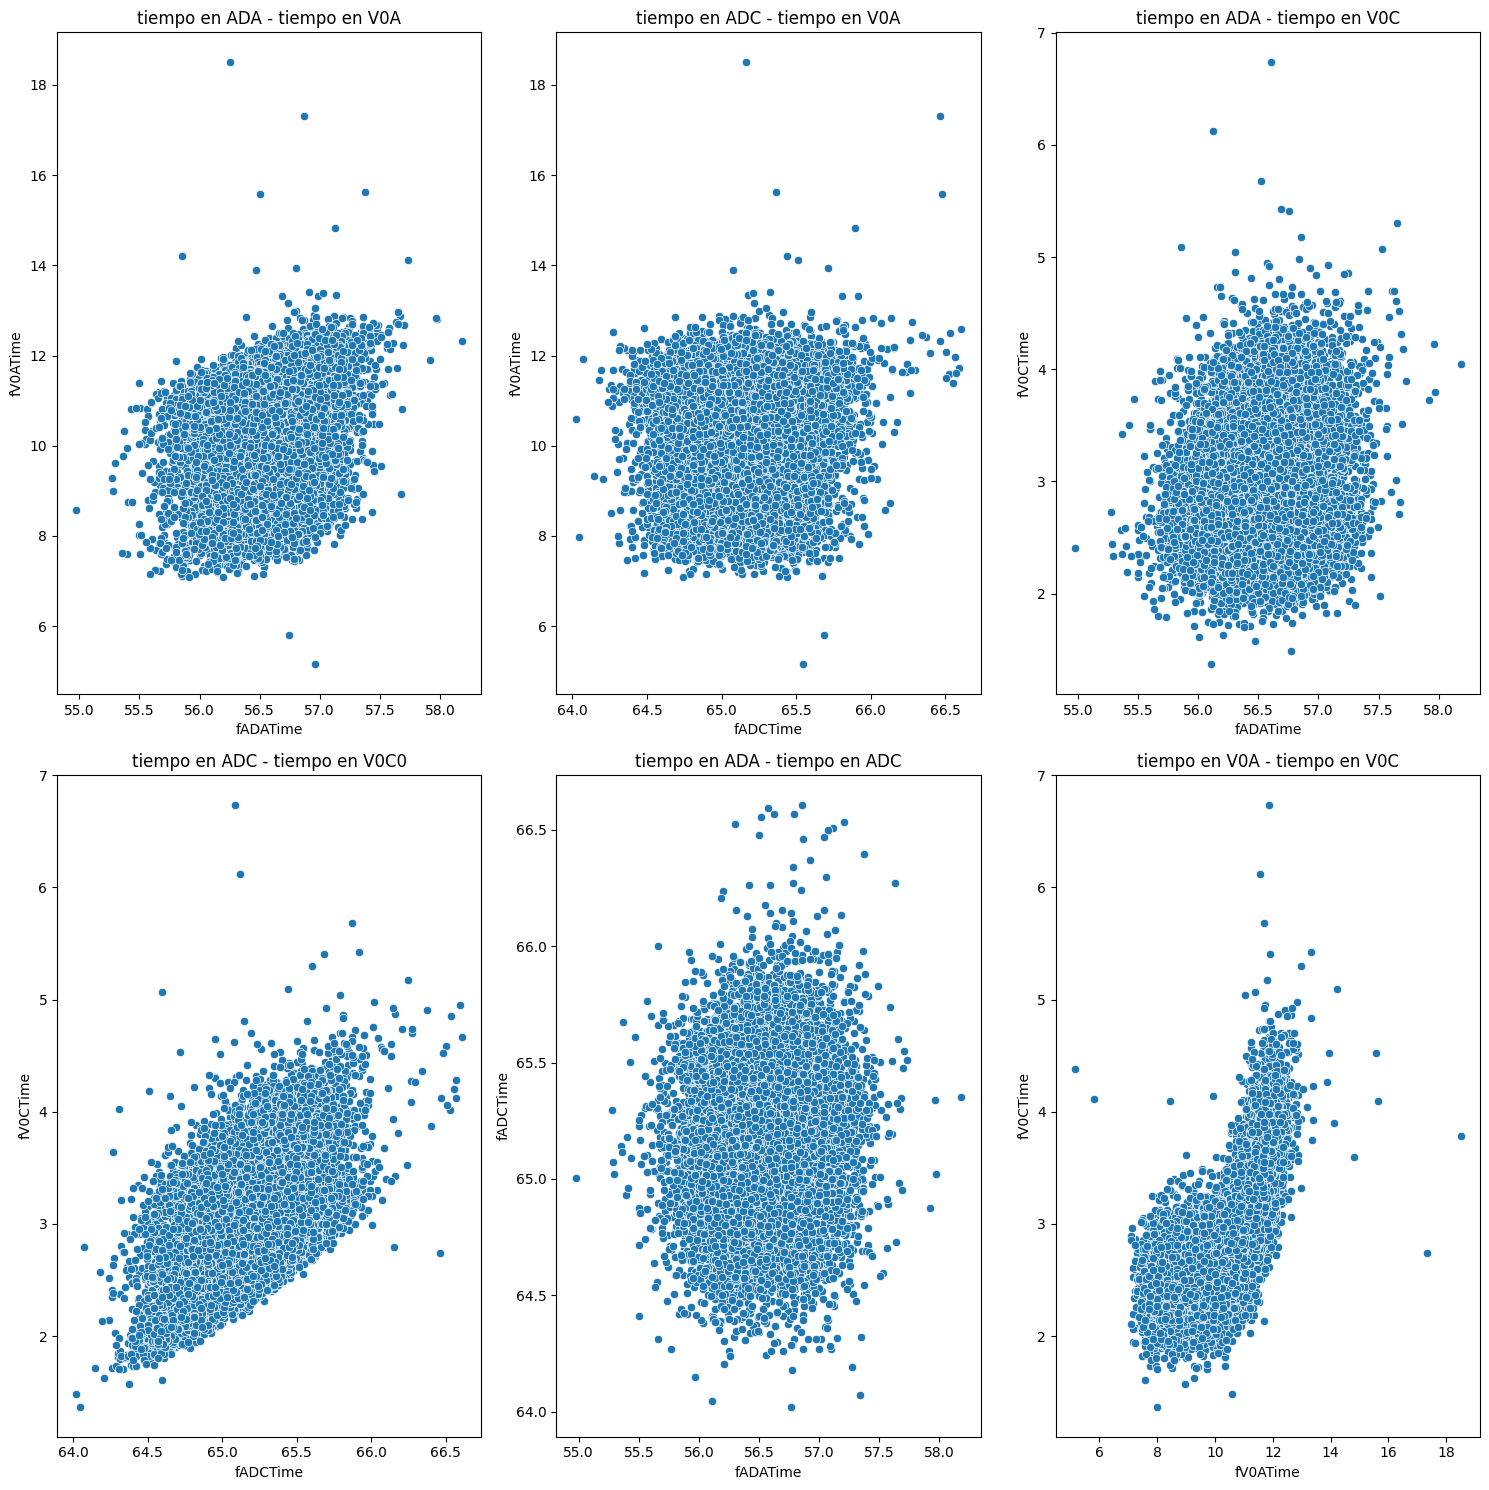

In [142]:
                                #DONE 
#tiempo en ADA - tiempo en V0A    X
#tiempo en ADC - tiempo en V0A    X
#tiempo en ADA - tiempo en V0C    X
#tiempo en ADC - tiempo en V0C    X
#tiempo en ADA - tiempo en ADC    X
#tiempo en V0A - tiempo en V0C    X

# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

sn.scatterplot(data = df_ADyV0_D , x='fADATime', y='fV0ATime', ax=axes[0,0])
axes[0,0].set_title('tiempo en ADA - tiempo en V0A')

sn.scatterplot(data=df_ADyV0_D, x='fADCTime', y='fV0ATime', ax=axes[0,1])
axes[0,1].set_title('tiempo en ADC - tiempo en V0A')

sn.scatterplot(data=df_ADyV0_D , x='fADATime', y='fV0CTime', ax=axes[0,2])
axes[0,2].set_title('tiempo en ADA - tiempo en V0C')

sn.scatterplot(data=df_ADyV0_D , x='fADCTime', y='fV0CTime', ax=axes[1,0])
axes[1,0].set_title('tiempo en ADC - tiempo en V0C0')

sn.scatterplot(data=df_ADyV0_D , x='fADATime', y='fADCTime', ax=axes[1,1])
axes[1,1].set_title('tiempo en ADA - tiempo en ADC')

sn.scatterplot(data=df_ADyV0_D , x='fV0ATime', y='fV0CTime', ax=axes[1,2])
axes[1,2].set_title('tiempo en V0A - tiempo en V0C')

# Adjust the spacing between plots
plt.tight_layout()

#fig.savefig("ComTime_pb.png") 

# Display the plot
plt.show()

##### Elaboración del dataframe final 

In [ ]:
df_Multiplicity = pd.read_csv('Data/pb/df_Multiplicity_pb_mean.csv')
df_Multiplicity

In [135]:
#si se necesita remplazar la bandera de -1024.000000 por 0 
df_timeV0 = pd.read_csv('Data/df_fV0Time.csv')
df_timeV0.replace(-1024.000000, 0, inplace=True)

df_timeAD = pd.read_csv('Data/df_fADTime.csv')
df_timeAD.replace(-1024.000000, 0, inplace=True)

In [ ]:
df_ADyV0 = pd.read_csv('Data/pb/df_ADyV0_AC_pb.csv')
df_Multiplicity = pd.read_csv('Data/pb/df_Multiplicity_pb_mean.csv') 

df_result = pd.concat([df_ADyV0, df_Multiplicity], axis = 1)

In [57]:
df_timeV0 = pd.read_csv('Data/pb/df_fV0Time_pb.csv')
df_timeV0.replace(-1024.000000, 0, inplace=True)
df_timeAD = pd.read_csv('Data/pb/df_fADTime_pb.csv')
df_timeAD.replace(-1024.000000, 0, inplace=True)

df_timeV0["Promedio"] = df_timeV0.iloc[:, :].mean(axis = 1)
df_timeAD["Promedio"] = df_timeAD.iloc[:, :].mean(axis = 1)

df_Time = pd.DataFrame()

#new_df['multy'] =pd.DataFrame(multy_array)
#new_df['time'] =pd.DataFrame(time_array)

df_Time['Time V0'] = df_timeV0[['Promedio']].copy()
df_Time['Time AD'] = df_timeAD[['Promedio']].copy()
#df_Time.to_csv('Data/pb/df_TimeV0yCD_pb_mean.csv', index=False)
#print("done")
#df_Time

In [58]:
df_Time = pd.read_csv('Data/pb/df_TimeV0yCD_pb_mean.csv')
df_Time

,Time V0,Time AD
0,6.027303,52.999871
1,7.073135,60.663086
2,3.190859,60.949535
3,7.931896,60.901374
4,5.458299,46.138455
...,...,...
19532,5.353988,60.695015
19533,0.000000,0.000000
19534,5.503199,60.617722
19535,0.000000,0.000000


In [61]:
df_ADyV0 = pd.read_csv('Data/pb/df_ADyV0_AC_pb.csv')
df_ADyV0.replace(-1024.000000, 0, inplace=True)

df_Multiplicity = pd.read_csv('Data/pb/df_Multiplicity_pb_mean.csv') 

df_result = pd.concat([df_ADyV0, df_Multiplicity], axis = 1)

df_V0yAD = pd.concat([df_result, df_Time], axis = 1)

#df_V0yAD.to_csv('Data/pb/df_V0yAD_pb.csv', index=False)
#print("done")

done


In [50]:
#df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1)]
#df_V0yAD = df_V0yAD[(df_V0yAD['fADADecision'] == 1)]
#df_V0yAD.to_csv('Data/df_V0yAD.csv', index=False)

In [62]:
df_V0yAD = pd.read_csv('Data/pb/df_V0yAD_pb.csv')
df_V0yAD

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD,Time V0,Time AD
0,56.672527,64.506424,1,1,10.810712,2.254692,1,1,258.457969,4447.641380,6.027303,52.999871
1,56.363200,64.968285,1,1,11.165974,3.369427,1,1,73.820938,1971.272060,7.073135,60.663086
2,56.884500,64.750130,1,1,12.382841,3.200753,1,1,2.448426,112.389265,3.190859,60.949535
3,56.806347,65.596930,1,1,12.060843,4.141077,1,1,45.903435,686.068694,7.931896,60.901374
4,56.890340,64.809200,1,1,7.727922,2.277894,1,1,527.949958,8250.845551,5.458299,46.138455
...,...,...,...,...,...,...,...,...,...,...,...,...
19532,56.105220,65.261710,1,1,7.845979,2.589957,1,1,466.083782,6621.020508,5.353988,60.695015
19533,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
19534,56.406680,64.808700,1,1,9.572428,2.171332,1,1,449.924681,8239.601074,5.503199,60.617722
19535,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.012879,3.607266,0.000000,0.000000


### Cálculo de los parametros a analizar 

In [3]:
df_V0yAD = pd.read_csv('Data/pb/df_V0yAD_pb.csv')
df_V0yAD

,fADATime,fADCTime,fADADecision,fADCDecision,fV0ATime,fV0CTime,fV0ADecision,fV0CDecision,Multiplicity V0,Multiplicity AD,Time V0,Time AD
0,56.672527,64.506424,1,1,10.810712,2.254692,1,1,258.457969,4447.641380,6.027303,52.999871
1,56.363200,64.968285,1,1,11.165974,3.369427,1,1,73.820938,1971.272060,7.073135,60.663086
2,56.884500,64.750130,1,1,12.382841,3.200753,1,1,2.448426,112.389265,3.190859,60.949535
3,56.806347,65.596930,1,1,12.060843,4.141077,1,1,45.903435,686.068694,7.931896,60.901374
4,56.890340,64.809200,1,1,7.727922,2.277894,1,1,527.949958,8250.845551,5.458299,46.138455
...,...,...,...,...,...,...,...,...,...,...,...,...
19532,56.105220,65.261710,1,1,7.845979,2.589957,1,1,466.083782,6621.020508,5.353988,60.695015
19533,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
19534,56.406680,64.808700,1,1,9.572428,2.171332,1,1,449.924681,8239.601074,5.503199,60.617722
19535,0.000000,0.000000,0,0,0.000000,0.000000,0,0,0.012879,3.607266,0.000000,0.000000


In [21]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) ]
#df_V0yAD

#### Rango (0,250)

In [24]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1) & (df_V0yAD['fADCDecision'] == 1)]
df_V0yAD_02 = df_V0yAD[(df_V0yAD['Multiplicity V0'] > 0) & (df_V0yAD['Multiplicity V0'] < 250)]

In [161]:
#df_V0yAD_02 

##### ADATime - V0ATime

In [25]:
# Calculate the difference between the two columns                                          #Condición a cambiar
#df_result_V0_1 = df_result[(df_result['Multiplicity V0'] > 0) & (df_result['Multiplicity V0'] < 2)]
#Resta de los valores indicados
df_V0yAD_02['ADATime - V0ATime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fV0ATime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\3527260020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['ADATime - V0ATime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fV0ATime']


In [166]:
#sn.kdeplot(data = df_V0yAD_02['ADATime - V0ATime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

45.089764060786486   0.3371187524983886


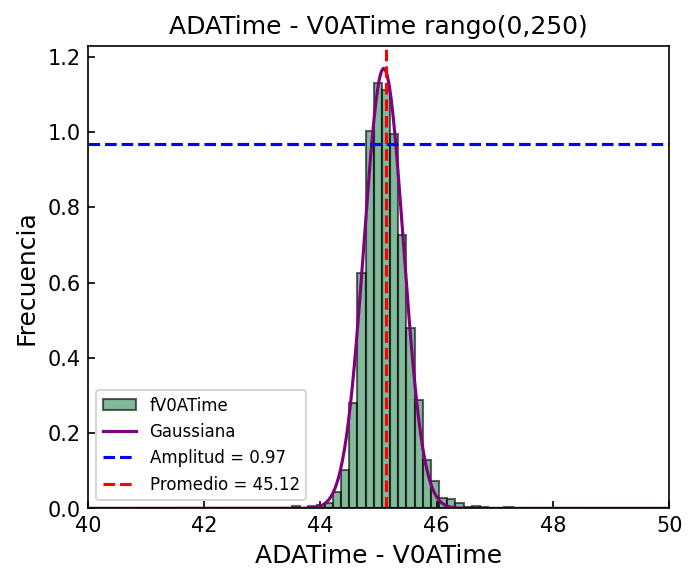

In [26]:
data_to_plot = df_V0yAD_02['ADATime - V0ATime']

#trazar histograma
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 100, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)

plt.xlim([40,50]) #Cambiar según la escala
plt.title('ADATime - V0ATime rango(0,250)') 
plt.xlabel('ADATime - V0ATime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
#plt.title("TrackMate Info", fontsize = 12)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# Función gaussiana de ajuste
#Primero se define la función a ajustar
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))
    

#Calcular el centro del bin para usarlo como datos y para ajustar
bins = (bins[:-1] + np.diff(bins) / 2)

#Crear un eje x arbitrario para ajustar
x_values_to_fit = np.linspace(40,50,300) #Cambiar dependiendo de la escala para gaussiano 

# Ajuste los datos y grafique el resultado
# p0 es la estimación inicial de los coeficientes de ajuste (A, mu y sigma arriba)
param, cov = curve_fit(gaussian, bins,counts, p0=(45,48,0.3)) #Cambiar dependiendo de la escala 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# parámetros de ajuste 
amp_gaus  = param[0] #amplitud
mean_gaus = param[1] #media de la distribución gaussiana
std_gau   = param[2] #desviación estándar de la distribución

# Calcular la media y la desviación estándar
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

# Calcular la amplitud de la curva gaussiana
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Crear un histograma para aproximar la curva gaussiana
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Graficar el histograma (aproximación gaussiana)

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##

print(mean_gaus,' ', std_gau)
#Guardar figura
#plt.savefig('Resultados/Tiempo/pb/ADATime-V0ATime_ResolTim_(0-250)_pb.png', transparent=False, bbox_inches = 'tight')

##### ADCTime - V0CTime

In [27]:
#df_result_V0_1 = df_result[(df_result['Multiplicity V0'] > 0) & (df_result['Multiplicity V0'] < 2)]
#Resta de los valores indicados
df_V0yAD_02['ADCTime - V0CTime'] = df_V0yAD_02['fADCTime'] - df_V0yAD_02['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\467145280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['ADCTime - V0CTime'] = df_V0yAD_02['fADCTime'] - df_V0yAD_02['fV0CTime']


In [191]:
#sn.kdeplot(data = df_V0yAD_02['ADCTime - V0CTime'])
#plt.xlim([100,70])  
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

61.81023821618781   -0.33391177587483817


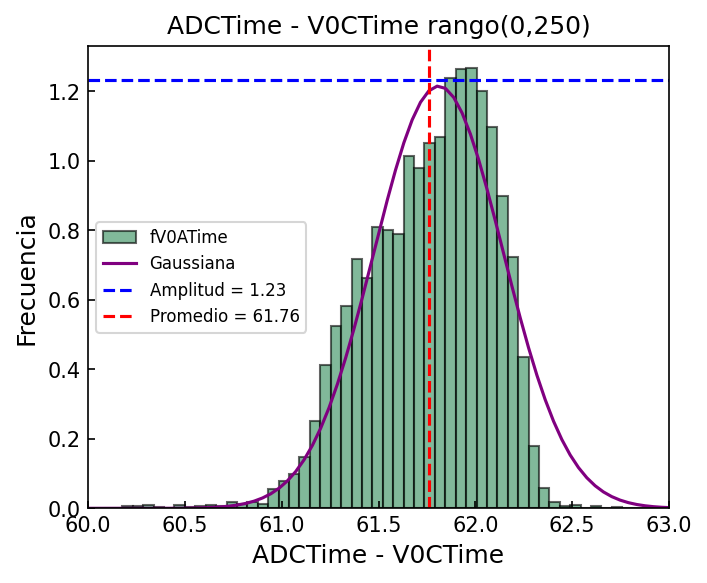

In [28]:
data_to_plot = df_V0yAD_02['ADCTime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 100, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([60,63]) #Change dependig the scale 
plt.title('ADCTime - V0CTime rango(0,250)') 
plt.xlabel('ADCTime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(40,70,700) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(62,62.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()
###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)


# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADCTime-V0CTime_ResolTim_(0-250)_pb.png', transparent=False, bbox_inches = 'tight')

##### ADATime - ADCTime

In [29]:
df_V0yAD_02['ADATime - ADCTime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fADCTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\1759687642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['ADATime - ADCTime'] = df_V0yAD_02['fADATime'] - df_V0yAD_02['fADCTime']


In [181]:
#df_V0yAD_02

In [182]:
#sn.kdeplot(data = df_V0yAD_02['ADATime - ADCTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

-8.581673280621933   0.4261810520814587


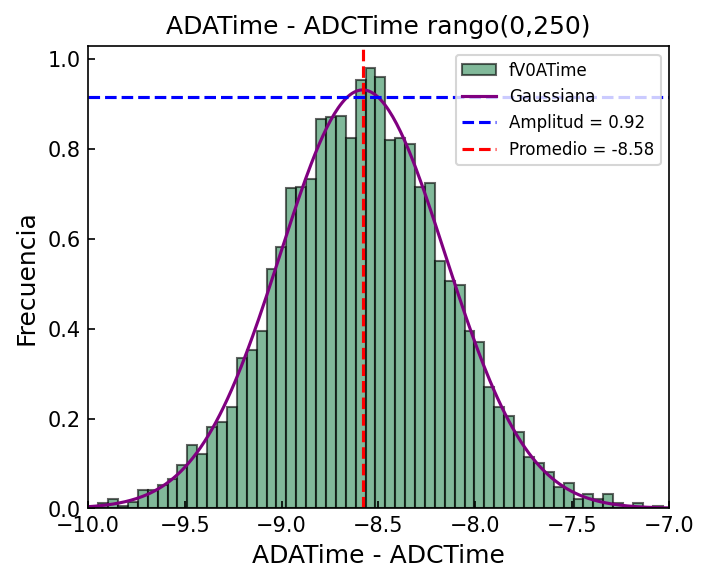

In [30]:
data_to_plot = df_V0yAD_02['ADATime - ADCTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 70, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([-10,-7]) #Change dependig the scale 
plt.title('ADATime - ADCTime rango(0,250)') 
plt.xlabel('ADATime - ADCTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-10,-5,500) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(-9,-8,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##

#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADATime-ADCTime_ResolTim_(0-250)_pb.png', transparent=False, bbox_inches = 'tight')

##### V0ATime - V0CTime

In [31]:
df_V0yAD_02['V0ATime - V0CTime'] = df_V0yAD_02['fV0ATime'] - df_V0yAD_02['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\4278981865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_02['V0ATime - V0CTime'] = df_V0yAD_02['fV0ATime'] - df_V0yAD_02['fV0CTime']


In [189]:
#sn.kdeplot(data = df_V0yAD_02['V0ATime - V0CTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

8.063728212512563   0.3992727011345128


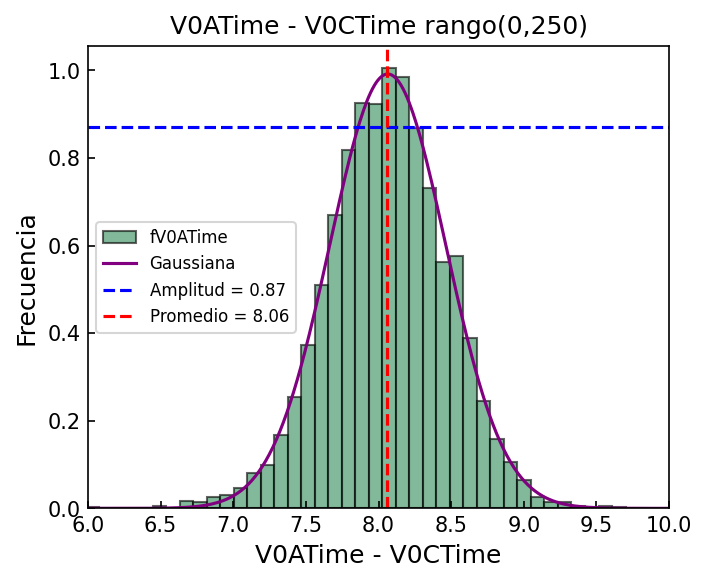

In [32]:
data_to_plot = df_V0yAD_02['V0ATime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 150, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([6,10]) #Change dependig the scale 
plt.title('V0ATime - V0CTime rango(0,250)') 
plt.xlabel('V0ATime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)
#plt.title("TrackMate Info", fontsize = 12)
plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(5,11,500) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(8,8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')

plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##

#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/V0ATime-V0CTime_ResolTim_(0-250)_pb.png', transparent=False, bbox_inches = 'tight')

#### Rango (250,450)

In [33]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1) & (df_V0yAD['fADCDecision'] == 1)]
df_V0yAD_24 = df_V0yAD[(df_V0yAD['Multiplicity V0'] > 250) & (df_V0yAD['Multiplicity V0'] < 450)]

In [9]:
#df_V0yAD_24

##### ADATime - V0ATime

In [34]:
df_V0yAD_24['ADATime - V0ATime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fV0ATime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\3568867719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['ADATime - V0ATime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fV0ATime']


In [66]:
#sn.kdeplot(data = df_V0yAD_24['ADATime - V0ATime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

46.02459103003106   0.447208471523997


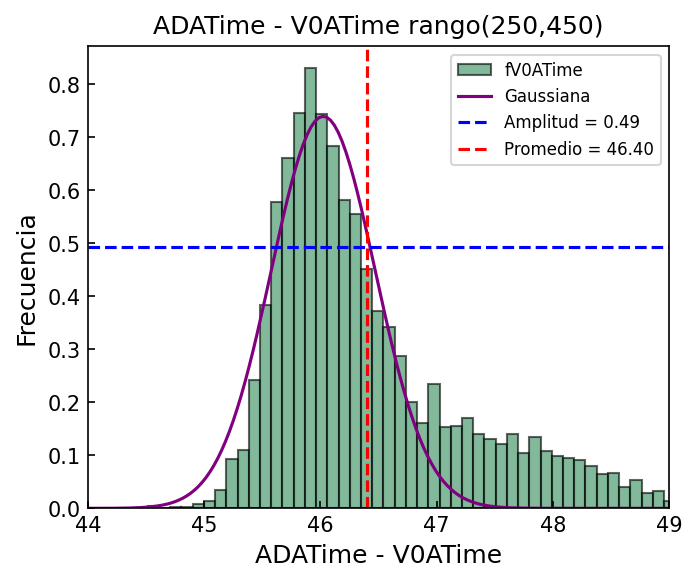

In [35]:
data_to_plot = df_V0yAD_24['ADATime - V0ATime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 50, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([44,49]) #Change dependig the scale 
plt.title('ADATime - V0ATime rango(250,450)') 
plt.xlabel('ADATime - V0ATime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(40,50,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(46,46.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADATime-V0ATime_ResolTim_(250-450)_pb.png', transparent=False, bbox_inches = 'tight')

##### ADCTime - V0CTime

In [36]:
df_V0yAD_24['ADCTime - V0CTime'] = df_V0yAD_24['fADCTime'] - df_V0yAD_24['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\2742996315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['ADCTime - V0CTime'] = df_V0yAD_24['fADCTime'] - df_V0yAD_24['fV0CTime']


In [23]:
#sn.kdeplot(data = df_V0yAD_24['ADCTime - V0CTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

62.45893534783203   0.14112475242702474


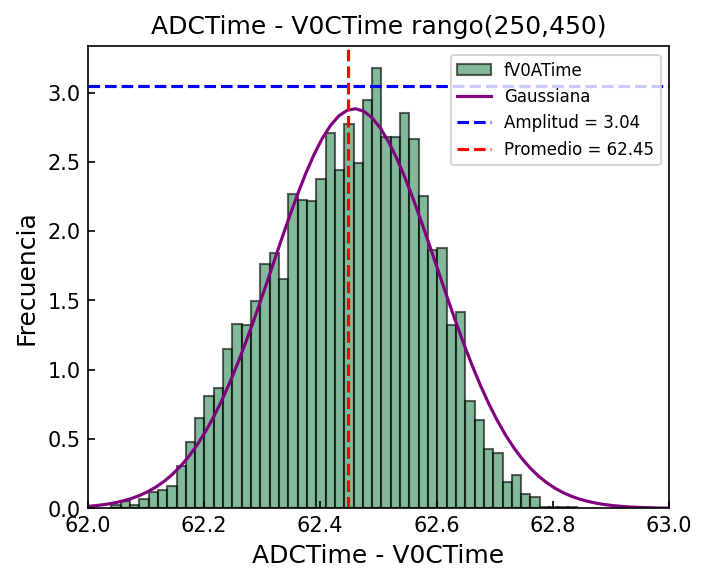

In [37]:
data_to_plot = df_V0yAD_24['ADCTime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 50, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([62,63]) #Change dependig the scale 
plt.title('ADCTime - V0CTime rango(250,450)') 
plt.xlabel('ADCTime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit =  np.linspace(60,70,700) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(62,62.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADCTime-V0CTime_ResolTim_(250-450)_pb.png', transparent=False, bbox_inches = 'tight')

##### ADATime - ADCTime

In [38]:
df_V0yAD_24['ADATime - ADCTime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fADCTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\2767746026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['ADATime - ADCTime'] = df_V0yAD_24['fADATime'] - df_V0yAD_24['fADCTime']


In [28]:
#sn.kdeplot(data = df_V0yAD_24['ADATime - ADCTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

-8.599385033754578   0.4292130210111133


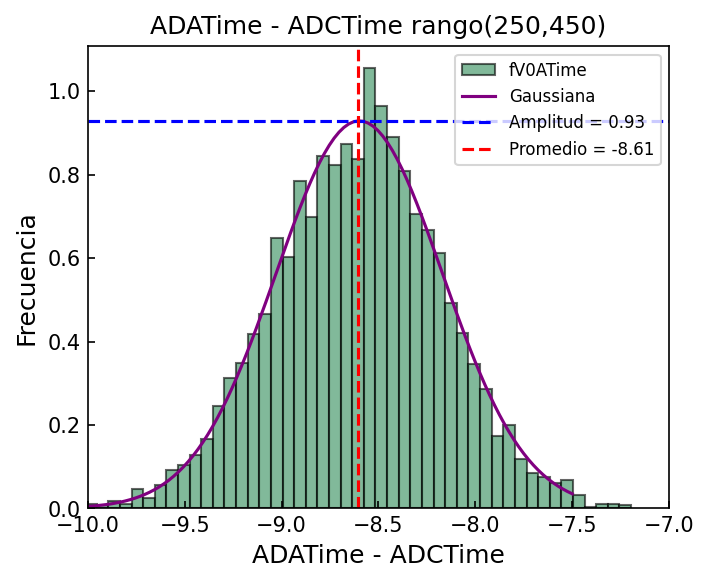

In [39]:
data_to_plot = df_V0yAD_24['ADATime - ADCTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 50, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([-10,-7]) #Change dependig the scale 
plt.title('ADATime - ADCTime rango(250,450)') 
plt.xlabel('ADATime - ADCTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-15,-7.5,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(-9,-8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADATime-ADCTime_ResolTim_(250-450)_pb.png', transparent=False, bbox_inches = 'tight')

##### V0ATime - V0CTime

In [40]:
df_V0yAD_24['V0ATime - V0CTime'] = df_V0yAD_24['fV0ATime'] - df_V0yAD_24['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\4122369046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_24['V0ATime - V0CTime'] = df_V0yAD_24['fV0ATime'] - df_V0yAD_24['fV0CTime']


In [32]:
#sn.kdeplot(data = df_V0yAD_24['V0ATime - V0CTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

7.717569522189116   -0.546957440596035


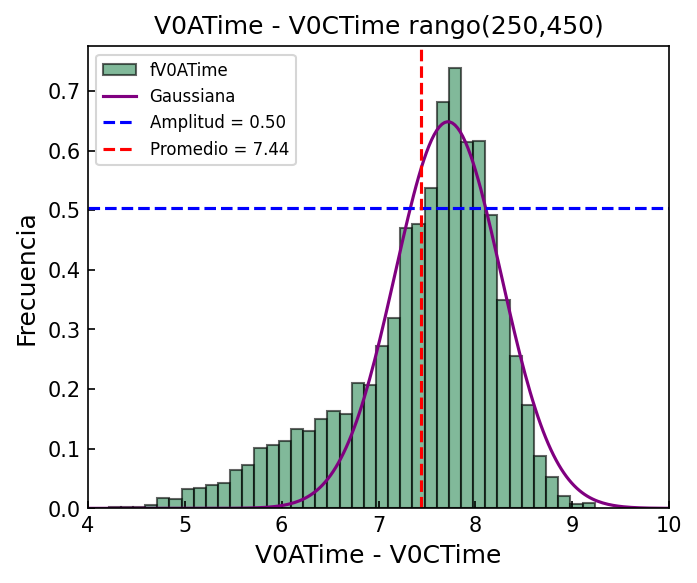

In [41]:
data_to_plot = df_V0yAD_24['V0ATime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 40, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([4,10]) #Change dependig the scale 
plt.title('V0ATime - V0CTime rango(250,450)') 
plt.xlabel('V0ATime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(3,11,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(8,9,0.3)) #Change dependig the scale  
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/VOATime-V0CTime_ResolTim_(250-450)_pb.png', transparent=False, bbox_inches = 'tight')

#### Rango (450,700)

In [42]:
df_V0yAD = df_V0yAD[(df_V0yAD['fV0ADecision'] == 1) & (df_V0yAD['fV0CDecision'] == 1) & (df_V0yAD['fADADecision'] == 1) & (df_V0yAD['fADCDecision'] == 1)]
df_V0yAD_46 = df_V0yAD[(df_V0yAD['Multiplicity V0'] > 450) & (df_V0yAD['Multiplicity V0'] < 700)]

In [36]:
#df_V0yAD_46

##### ADATime - V0ATime

In [43]:
df_V0yAD_46['ADATime - V0ATime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fV0ATime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\347475215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['ADATime - V0ATime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fV0ATime']


In [41]:
#sn.kdeplot(data = df_V0yAD_46['ADATime - V0ATime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

47.45181232817463   1.0211403980920004


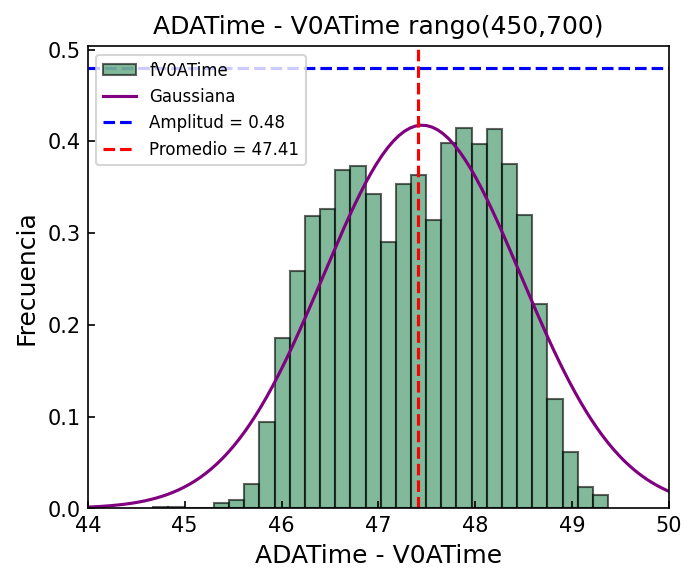

In [58]:
data_to_plot = df_V0yAD_46['ADATime - V0ATime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 30, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([44,50]) #Change dependig the scale 
plt.title('ADATime - V0ATime rango(450,700)') 
plt.xlabel('ADATime - V0ATime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(38,55,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(46,47,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2)  ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADATime-V0ATime_ResolTim_(450-700)_pb.png', transparent=False, bbox_inches = 'tight')

##### ADCTime - V0CTime

In [45]:
df_V0yAD_46['ADCTime - V0CTime'] = df_V0yAD_46['fADCTime'] - df_V0yAD_46['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\243420438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['ADCTime - V0CTime'] = df_V0yAD_46['fADCTime'] - df_V0yAD_46['fV0CTime']


In [65]:
#sn.kdeplot(data = df_V0yAD_46['ADCTime - V0CTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

62.674871270440555   0.09491019253555515


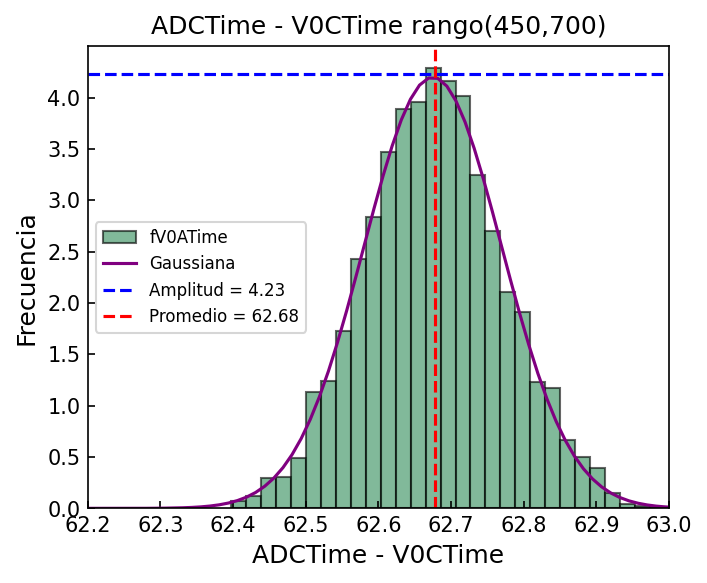

In [59]:
data_to_plot = df_V0yAD_46['ADCTime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 30, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([62.2,63]) #Change dependig the scale 
plt.title('ADCTime - V0CTime rango(450,700)') 
plt.xlabel('ADCTime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(60,65,400) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(62.5,63,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) 
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADCTime-V0CTime_ResolTim_(450-700)_pb.png', transparent=False, bbox_inches = 'tight')

##### ADATime - ADCTime

In [47]:
df_V0yAD_46['ADATime - ADCTime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fADCTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\1828731789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['ADATime - ADCTime'] = df_V0yAD_46['fADATime'] - df_V0yAD_46['fADCTime']


In [63]:
#sn.kdeplot(data = df_V0yAD_46['ADATime - ADCTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

-8.648069355384647   0.4284695346068192


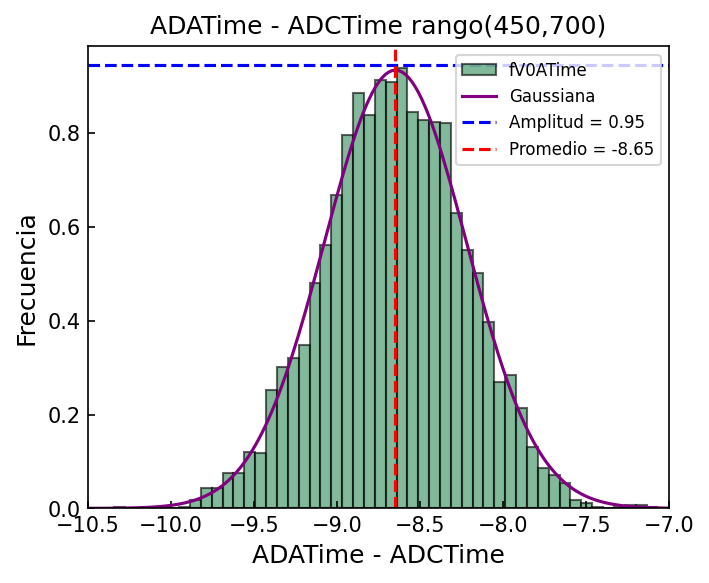

In [60]:
data_to_plot = df_V0yAD_46['ADATime - ADCTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 50, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([-10.5,-7]) #Change dependig the scale 
plt.title('ADATime - ADCTime rango(450,700)') 
plt.xlabel('ADATime - ADCTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-12,-6,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(-9,-8.5,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/ADATime-ADCTime_ResolTim_(450-700)_pb.png', transparent=False, bbox_inches = 'tight')

##### V0ATime - V0CTime

In [49]:
df_V0yAD_46['V0ATime - V0CTime'] = df_V0yAD_46['fV0ATime'] - df_V0yAD_46['fV0CTime']

C:\Users\Asus\AppData\Local\Temp\ipykernel_1440\4058569591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V0yAD_46['V0ATime - V0CTime'] = df_V0yAD_46['fV0ATime'] - df_V0yAD_46['fV0CTime']


In [64]:
#sn.kdeplot(data = df_V0yAD_46['V0ATime - V0CTime']) 
#plt.xlabel("fV0ATime", size=12)    
#plt.ylabel("Frequency", size=12)                
#plt.grid(True, alpha=0.3, linestyle="--")   
#plt.show()

6.6111018955571295   0.9976606651378916


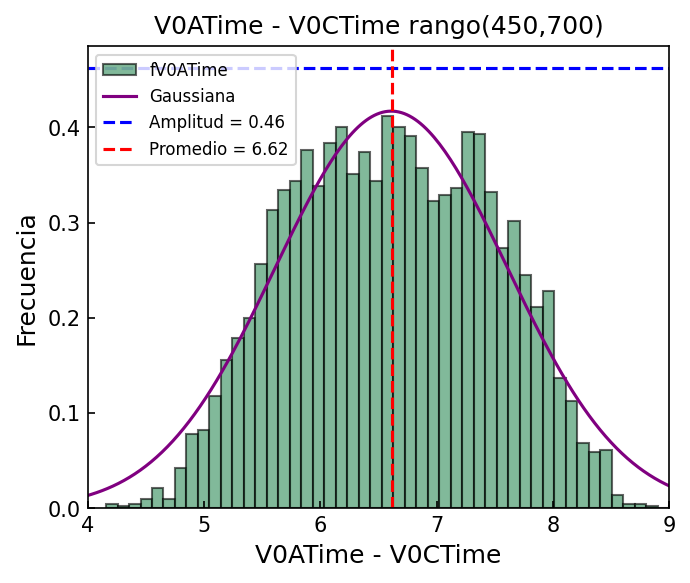

In [61]:
data_to_plot = df_V0yAD_46['V0ATime - V0CTime']

#plot pretty histogram
fig3 = plt.figure(figsize = (5,4), dpi = 150)

counts, bins, patches = plt.hist(data_to_plot, bins = 50, edgecolor='black', color = 'seagreen',  alpha=0.6, label = 'fV0ATime', density = 1)
 #
plt.xlim([4,9]) #Change dependig the scale  
plt.title('V0ATime - V0CTime rango(450,700)') 
plt.xlabel('V0ATime - V0CTime', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(loc=0, fontsize = 10, frameon = False)

plt.tick_params(direction = 'in', top=False, right=False)
plt.grid(False)

# fit Gaussian function

#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(3,10,300) #Change dependig the scale for gaussian 

# fit the data and plot the result
# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
param, cov = curve_fit(gaussian, bins,counts, p0=(6.2,6.9,0.3)) #Change dependig the scale 
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5, label = "Gaussiana")

# access fit parameters
amp_gaus  = param[0] #amplitude 
mean_gaus = param[1] #mean of gaussian dist
std_gau   = param[2] #stdev of the dist

# Calculate mean and standard deviation
mean = data_to_plot.mean()
std_dev = data_to_plot.std()

###########################################################
# Calculate the amplitude of the Gaussian curve
amplitude = 1 / (std_dev * np.sqrt(2 * np.pi))

# Create a histogram to approximate the Gaussian curve
counts, bin_edges = np.histogram(data_to_plot, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the histogram (Gaussian approximation)
#plt.plot(bin_centers, counts, label='Gaussian Curve (Histogram)')

# Marcar la amplitud y el pormedio
plt.axhline(amplitude, color='blue', linestyle='--', label=f'Amplitud = {amplitude:.2f}')
plt.axvline(mean, color='red', linestyle='--', label=f'Promedio = {mean:.2f}')


plt.legend(loc = 0, fontsize = 8)

#my_two_lists.add_item(amplitude, list_number=2) ##
#fancy way of printing info
print(mean_gaus,' ', std_gau)
#save figure
#plt.savefig('Resultados/Tiempo/pb/V0ATime-V0CTime_ResolTim_(450-700)_pb.png', transparent=False, bbox_inches = 'tight')

### Tiempo V0

In [102]:
df_timeV0 = pd.read_csv('Data/df_fV0Time.csv')
#df_timeV0

In [103]:
df_timeV0["Suma"] = df_timeV0.iloc[:, :].sum(axis = 1)
df_timeV0["Promedio"] = df_timeV0.iloc[:, :].mean(axis = 1)
df_timeV0

,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,...,val_56,val_57,val_58,val_59,val_60,val_61,val_62,val_63,Suma,Promedio
0,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
1,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
2,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
3,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
4,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,...,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-65536.000000,-2016.492308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2.906271,3.000156,-1024.000000,2.693358,3.435496,-1024.000000,3.759157,3.018283,3.026032,3.012265,...,-1024.000000,11.229528,-1024.000000,-1024.000000,-1024.000000,13.230840,-1024.000000,-1024.000000,-38791.986428,-1193.599582
4737,-1024.000000,2.075265,-1024.000000,1.978009,-1024.000000,3.596260,-1024.000000,-1024.000000,1.880489,2.716903,...,-1024.000000,-1024.000000,-1024.000000,9.891880,10.596437,-1024.000000,9.196608,12.185239,-29512.742142,-908.084374
4738,4.234684,-1024.000000,-1024.000000,-1024.000000,3.035445,2.534101,2.302003,-1024.000000,-1024.000000,2.663597,...,10.544925,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-1024.000000,-39752.348251,-1223.149177
4739,6.582262,2.350375,2.538524,3.092256,2.915774,3.148078,2.720357,3.095087,2.949539,2.597858,...,11.463334,11.869370,10.105138,10.027761,12.958988,10.427899,10.681471,10.297821,-592.238505,-18.222723


In [104]:
df_timeV0 = pd.read_csv('Data/df_fADTime.csv')
timeV0_array= df_timeV0.to_numpy().reshape(-1,1)
timeV0_array

array([[-1024.],
       [-1024.],
       [-1024.],
       ...,
       [-1024.],
       [-1024.],
       [-1024.]])

In [105]:
timeV0_array.shape

(75856, 1)